# Introduction

**Background Project**: \
KreditDulu as Credit Company using Machine Learning (ML) based on Alternate Data + Manual (Traditional) Credit Data to help them deciding credit scoring for each borrower in order to enables provision of fair interest rate and reduce risk of potential default (also collections stage to assess how likely a customer in collections is to pay back their debt).

**Objective**: \
KreditDulu requires Credit Scoring through the utilization of Machine Learning, as well as manual data and alternate data, to assist the lender in determining whether to approve/extend or deny credit to borrowers

**Expected Output**: \
KreditDulu can use a machine learning model that can classify the credit score.

Dataset: https://www.kaggle.com/datasets/parisrohan/credit-score-classification

Quick summary about Credit Scoring:
1. What is credit scoring?
* Credit Risk Modeling to help decide accept/deny credit who performed by lenders and financial institution to determine creditworthiness of potential borrowers or applicants (a person or owner of small-operated business) for loans or credit services
* Main purpose of credit scoring is to rank a borrower's credit riskiness, but not provide an estimate of a borrower's default probability
* Credit scoring apply to corporations and government, while credit scoring applies to individuals and small-operated business
* Banker will validate identity of prospective debtor to SLIK (look point of 2)
* Generally bigger amount of the loan then need more effort and variables (need more Know-Your-Customer information) to do scoring
* Addition of alternative credit scoring (in Indonesia) also can be used which regulated by OJK in POJK no. 13/POJK.02/2018

2. How process of Credit Scoring?
* Move with the times, there is an upgrade from conventional credit scoring mechanisms that use assorted paperwork and manual credit history (traditional data) to the new credit scoring mechanisms that combine traditional data with alternative data such as social media, electronic transactions and cellular data to conduct and assess the consumer's feasibility study as they usually do not have access to banking services (unbanked). [4]
* In Indonesia this process was better known as BI-Checking, and now is know as IDEB (Informasi Debitur) in system of SLIK (Sistem Layanan Informasi Keuangan/Finance Information Service System). For the full description can see on the image below. [5]

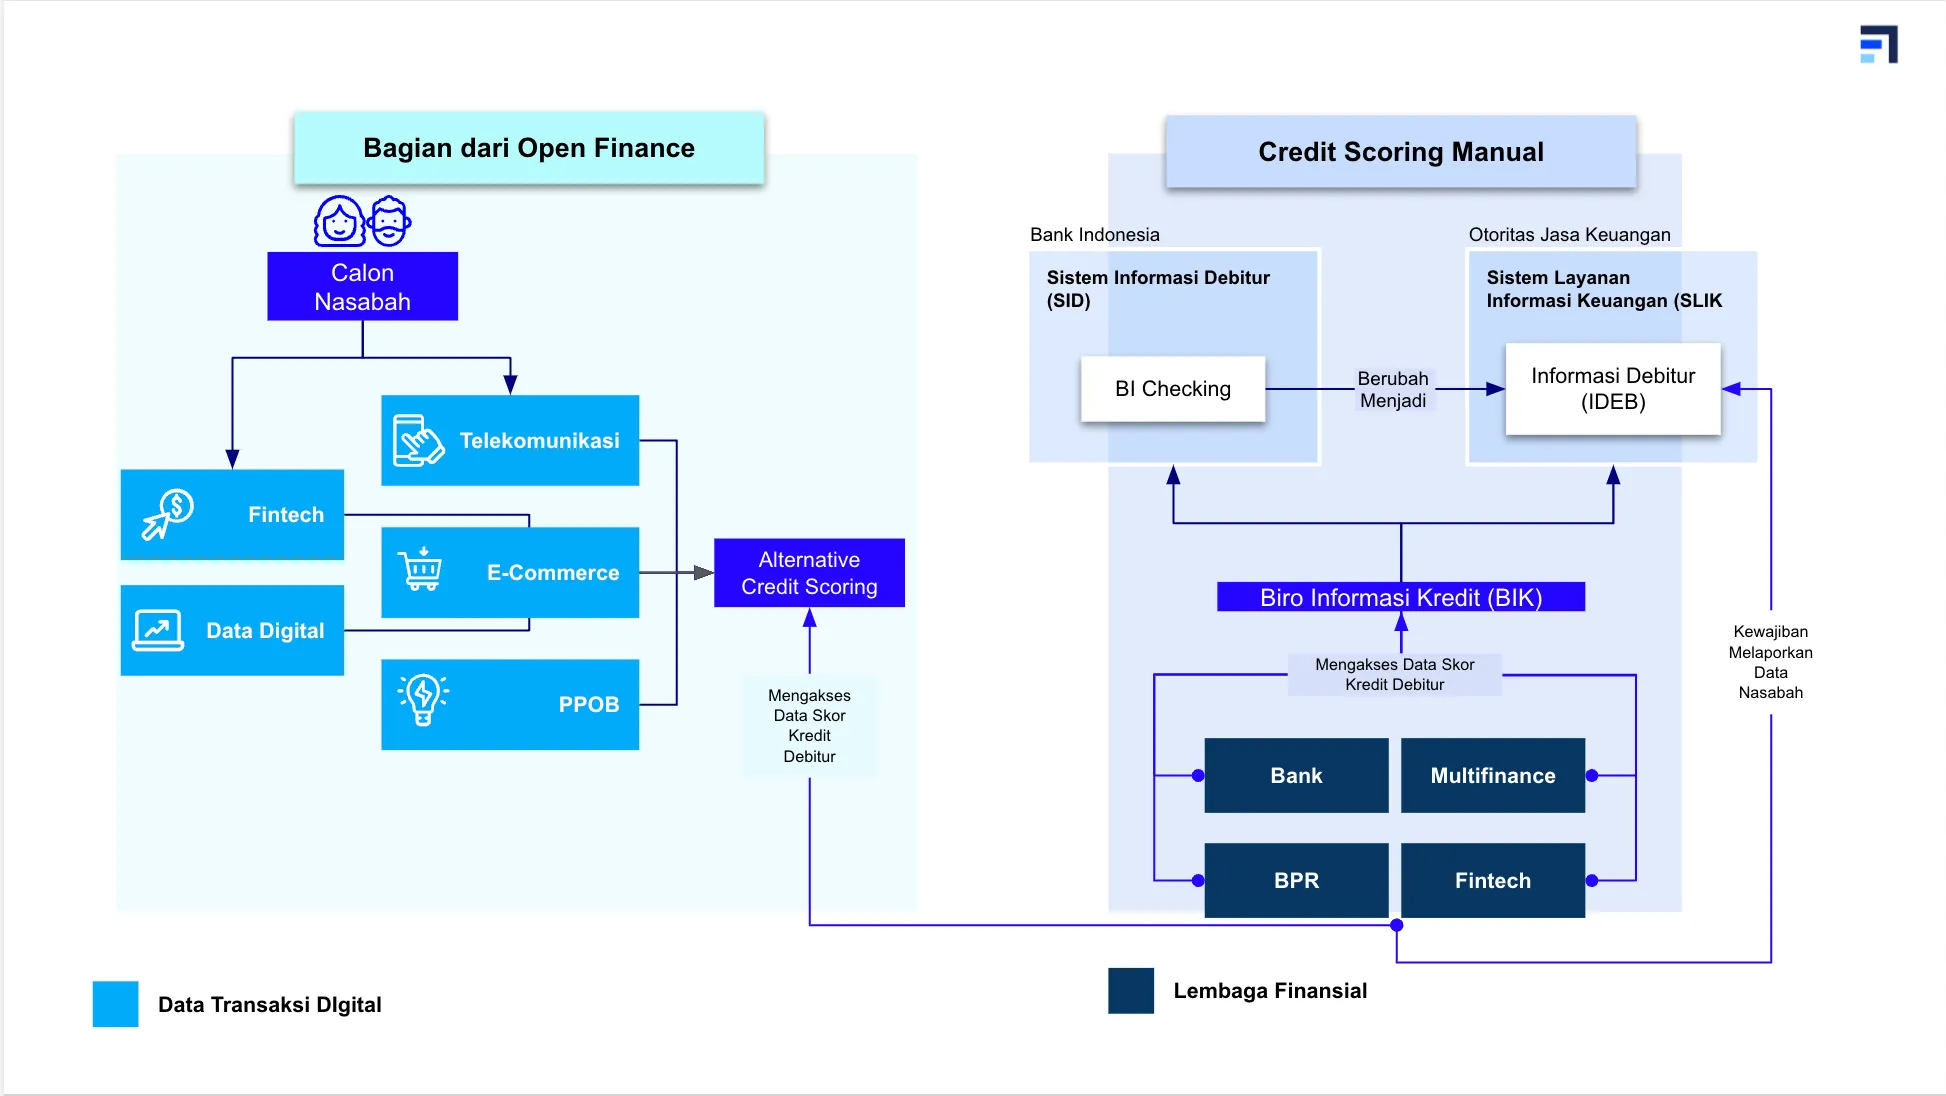

3. What parameter of scoring in Credit Scoring?:
* There 5C principles which are Character, Capacity, Capital, Condition, Collateral and 5P principles which are 5 Personality, Purpose, Prospect, Payment, Party. [1]
* Based on POJK no. 40/POJK.03/2019, there are 5 scores category (lancar/1, dalam perhatian khusus/2, kurang lancar/3, diragukan/4 & macet/5), which 1 will be accepted, 2 would be accepted, and 3,4,5 would not be accepted. So for simplify there are 3 classification for there scoring, excellent, good and poor. [1]

4. How many model of credit scoring that can be used?
* Mostly there are 2 models, FICO score (Fair Isaac Corporation's Credit), employed 90% of top lenders, while other is VantageScore that created by top 3 credit-reporting agencies, TransUnion, Experian and Equifax. [2]
___
Source: <br>
[1] https://id.blog.finantier.co/mengenal-credit-scoring-dan-teknologi-pendukungnya-8360edcf5c42 <br>
[2] https://www.investopedia.com/terms/c/credit_scoring.asp#:~:text=Credit%20scoring%20is%20a%20statistical,to%20extend%20or%20deny%20credit <br>
[3] https://www.weforum.org/agenda/2021/01/this-new-approach-to-credit-scoring-is-accelerating-financial-inclusion/ <br>
[4] https://repository.cips-indonesia.org/media/publications/560780-the-rise-of-innovative-credit-scoring-sy-0f4556b9.pdf <br>
[5] https://id.blog.finantier.co/perkembangan-credit-scoring-indonesia-bdae9b66984

Features Description:<br>
A. Traditional Information:
1. ID: A unique identifier for each record
2. Customer_ID: A unique identifier for each customer
3. Payment_Behaviour: An indicator of the customer's payment patterns & spending habits (in USD).
4. Num_of_Loan: The number of loans the customer has taken.
5. Type_of_Loan: The type or types of loans the customer has, indicated as a comma-separated list.
6. Delay_from_due_date: The delay in payment from the due date for loans or credit payments.
7. Num_of_Delayed_Payment: The number of payments that have been delayed.
8. Changed_Credit_Limit: A change in the credit limit, typically for a credit card.
9. Num_Credit_Inquiries: The number of credit inquiries/inspection made by potential lenders or creditors.
10. Credit_Mix: Information about the types of credit accounts held by the customer.
11. Outstanding_Debt: The amount of outstanding (huge) debt owed by the customer (in USD).
12. Credit_Utilization_Ratio: The credit utilization ratio, calculated as the credit card balance divided by the credit limit.
13. Credit_History_Age: The age of the credit history in years and months.
14. Payment_of_Min_Amount: Indicates whether the customer makes only the minimum payment on credit cards.
15. Total_EMI_per_month: The total Equated Monthly Installment (EMI) or equal repayment amount paid by the customer.

B. Non-Traditional Information:

B.1. Investing Information: <br>
16. Amount_invested_monthly (If the source of investment data is non-traditional) <br>

B.2. Demographic Information: <br>
17. Name: The name of the customer. <br>
18. Age: The age of the customer in years. <br>
19. SSN: Social Security Number (SSN) of the customer, a unique identifier used for personal identification. <br>
20. Occupation: The occupation or job role of the customer. <br>
21. Annual_Income: The annual income of the customer in monetary units (e.g., dollars). <br>
22. Monthly_Inhand_Salary: The monthly income after deductions, often referred to as take-home pay. <br>

B.3.  Bank & Credit  Information: <br>
23. Num_Bank_Accounts: The number of bank accounts the customer holds. <br>
24. Num_Credit_Card: The number of credit cards the customer possesses. <br>
25. Monthly_Balance: The monthly balance in the customer's account. <br>
26. Interest_Rate: The interest rate for some financial product. <br>
27. Month: The month of the record <br>

C. Target Variable: <br>
28. Credit_Score (Target variable, Poor, Standard, Good)

# Load Library

In [99]:
import numpy as np
import pandas as pd
from scipy import stats 
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler
from fancyimpute import IterativeImputer
from sklearn.impute import SimpleImputer

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE 

from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier
import xgboost as xgb
import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, mutual_info_score, roc_curve
from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, make_scorer
from scipy.stats import mode

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

# Import Dataset

In [100]:
# Open File
raw_path = '/Users/agagoks/Documents/Dibimbing/Showcase Project/Credit Risk (Classification) Modeling/Dataset/'
load_df = pd.read_csv(raw_path + 'train.csv')
df = load_df.copy()

/var/folders/17/pn2fwypx1qg13h_pjbf0t1ch0000gn/T/ipykernel_6478/1823396948.py:3: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  load_df = pd.read_csv(raw_path + 'train.csv')


In [101]:
df.head(3).T

,0,1,2
ID,0x1602,0x1603,0x1604
Customer_ID,CUS_0xd40,CUS_0xd40,CUS_0xd40
Month,January,February,March
Name,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh
Age,23,23,-500
SSN,821-00-0265,821-00-0265,821-00-0265
Occupation,Scientist,Scientist,Scientist
Annual_Income,19114.12,19114.12,19114.12
Monthly_Inhand_Salary,1824.843333,NaN,NaN
Num_Bank_Accounts,3,3,3


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

# Data Cleaning

## Handling Data Format & Data Type

The issues are:
* Numerical but it's string: `Age`, `Annual_Income`, `Monthly_Inhand_Salary`, `Num_Bank_Accounts`,
`Num_Credit_Card`, `Interest_Rate, Num_of_Loan`, `Delay_from_due_date`,
`Num_of_Delayed_Payment`, `Changed_Credit_Limit`, `Num_Credit_Inquiries`,
`Outstanding_Debt`, `Credit_Utilization_Ratio`, `Total_EMI_per_month`,
`Amount_invested_monthly`, `Monthly_Balance`
* `Credit_Mix` has _ instead of Good, Standard, Poor
* `Type_of_Loan` has ', and Auto_Loan, .....' instead of `Auto_Loan`, also has mix of borrower's account for 5800 combination
* `Payment_Behaviour` has '!@9#%8' instead of 'High_spent_Small_value_payments, ....'
* `Age` has range of (-)500-8698 instead of 18-123 (possibility range of borrower age)
* `Num_of_Delayed_Payment` has minus value & outliers
* `Credit_History_Age` has format X year Y month instead of numerical (months)
* `Delay_from_due_date` has negative values

### Fixing Numerical Features

In [103]:
# Convert it into numerical
Potentially_Numerical = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
                        'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
                        'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
                        'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month',
                         'Amount_invested_monthly', 'Monthly_Balance']
df = df.copy()
df[Potentially_Numerical] = df[Potentially_Numerical].apply(pd.to_numeric, errors='coerce')

In [104]:
ld_numericals = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
ld_categoricals = [col for col in df.columns if df[col].nunique() < 20]
ld_others = [col for col in df.columns if (df[col].nunique()) > 20 and (df[col].dtype.name not in ['int64', 'float64'])]

# Creating Series with the same name for both lists
ld_numerical_series = pd.Series(ld_numericals, name='numerical')
ld_categorical_series = pd.Series(ld_categoricals, name='categorical')
ld_other_series = pd.Series(ld_others, name='others')

# Concatenating the two series to create the DataFrame
ld_new_df = pd.concat([ld_numerical_series, ld_categorical_series, ld_other_series], axis=1)

ld_new_df

,numerical,categorical,others
0,Age,Month,ID
1,Annual_Income,Occupation,Customer_ID
2,Monthly_Inhand_Salary,Credit_Mix,Name
3,Num_Bank_Accounts,Payment_of_Min_Amount,SSN
4,Num_Credit_Card,Payment_Behaviour,Type_of_Loan
5,Interest_Rate,Credit_Score,Credit_History_Age
6,Num_of_Loan,NaN,NaN
7,Delay_from_due_date,NaN,NaN
8,Num_of_Delayed_Payment,NaN,NaN
9,Changed_Credit_Limit,NaN,NaN


In [105]:
# Create a list to store transformation results
transformed_data = []

# Convert the columns to numeric and store transformation results
for num in ld_numericals:
    df[num] = pd.to_numeric(df[num], errors='coerce')
    dtype = df[num].dtype
    transformed_data.append({'Column': num, 'Data_Type': dtype})

# Create a new DataFrame from the list of dictionaries
transformed_df = pd.DataFrame(transformed_data)

transformed_df

,Column,Data_Type
0,Age,float64
1,Annual_Income,float64
2,Monthly_Inhand_Salary,float64
3,Num_Bank_Accounts,int64
4,Num_Credit_Card,int64
5,Interest_Rate,int64
6,Num_of_Loan,float64
7,Delay_from_due_date,int64
8,Num_of_Delayed_Payment,float64
9,Changed_Credit_Limit,float64


### Checking The Distribution for Each Feature

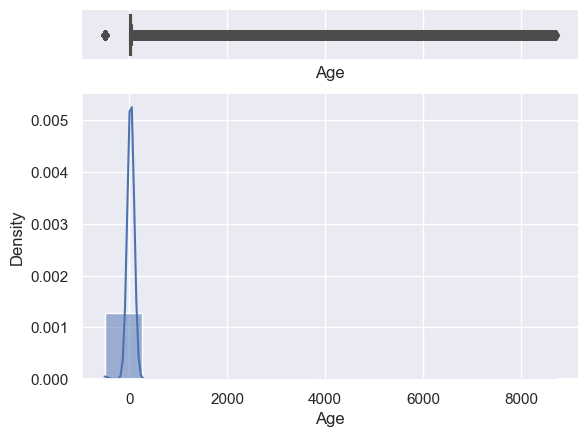

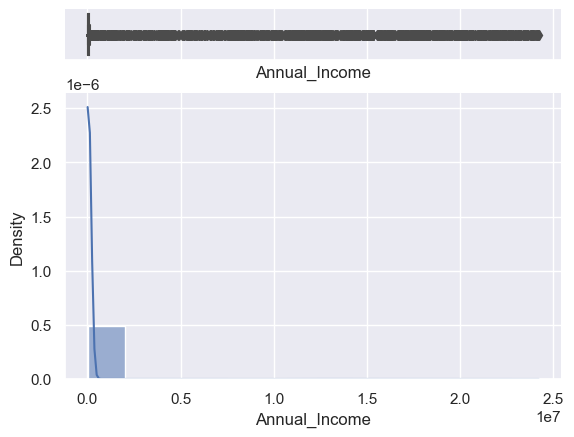

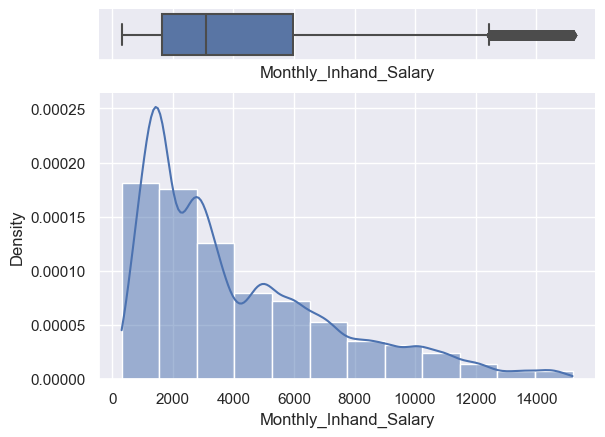

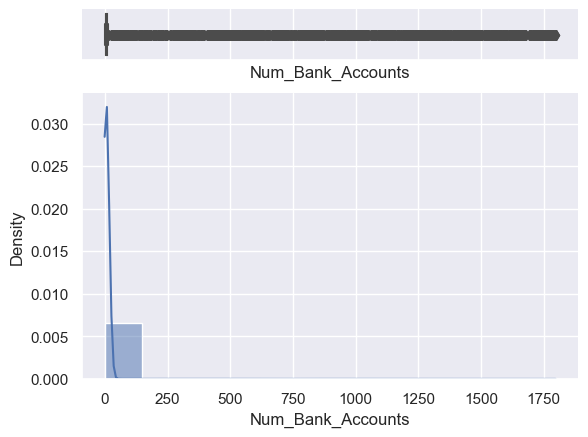

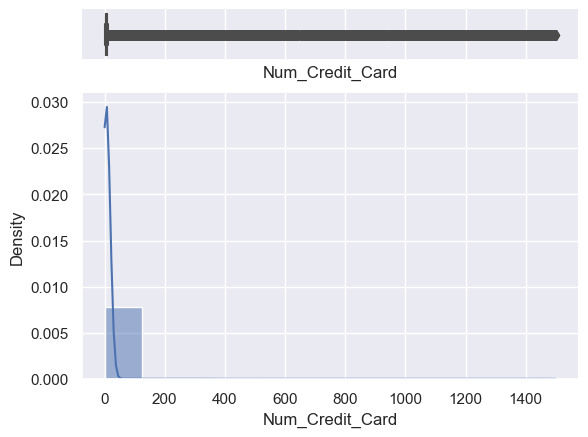

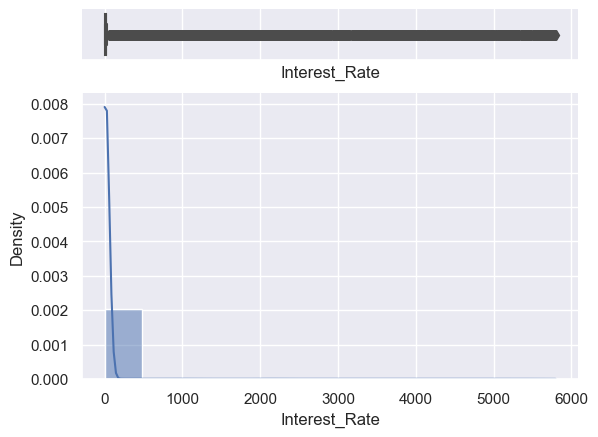

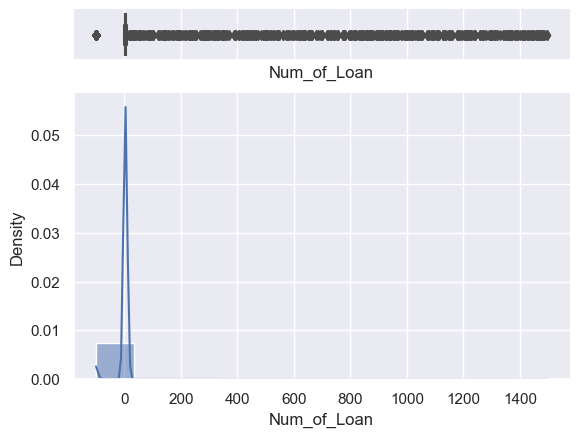

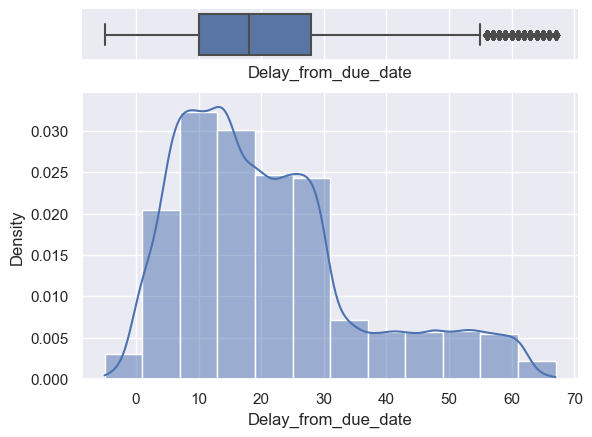

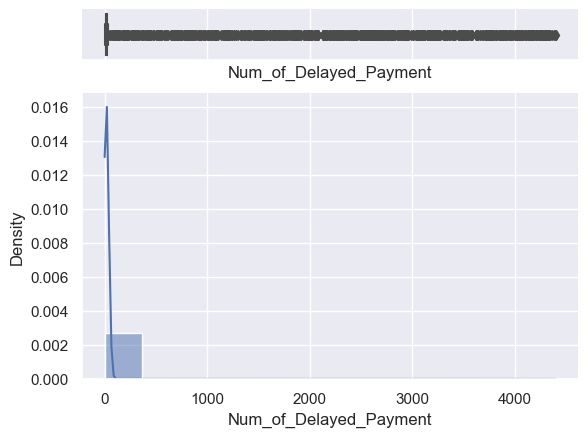

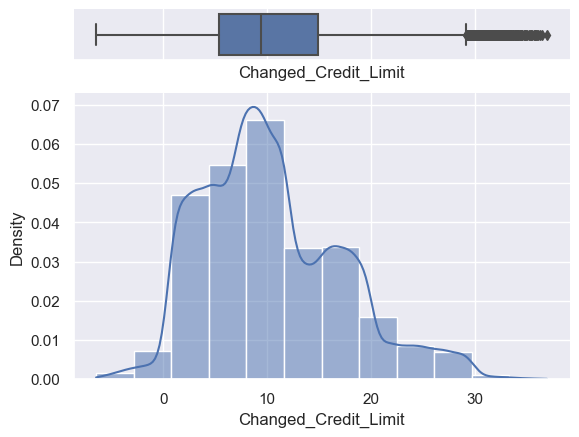

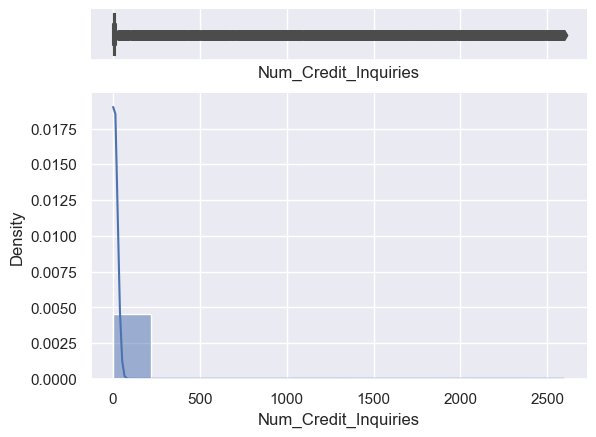

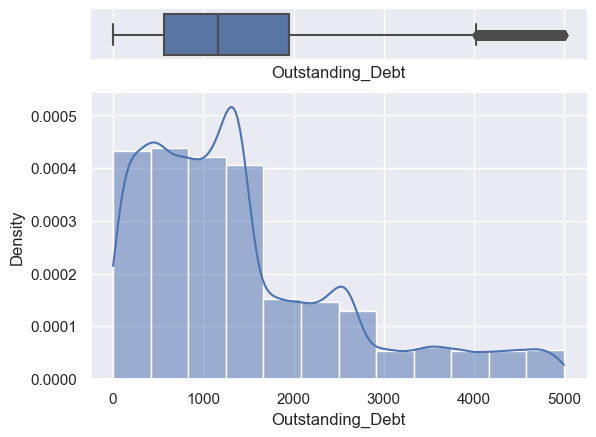

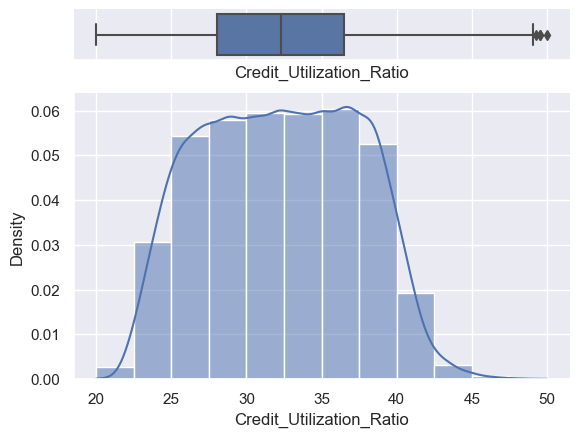

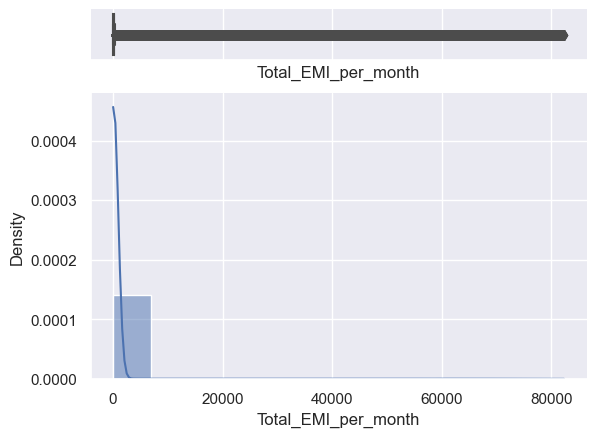

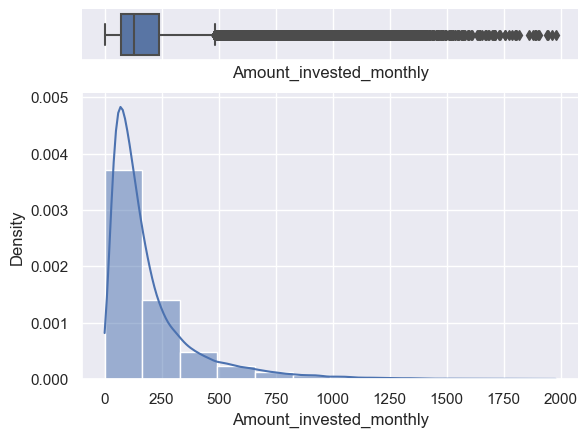

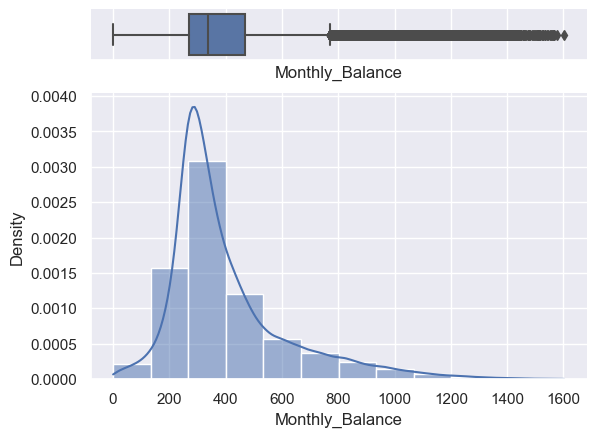

In [106]:
# Create subplots for each feature
for feature in ld_numericals:
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

    sns.boxplot(x=df[feature], ax=ax_box)
    sns.histplot(x=df[feature], bins=12, kde=True, stat='density', ax=ax_hist)

    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)

    plt.show()

### Remove _ in `Credit_Mix` Feature

In [107]:
# Checking _ inside `Credit Mix`
underscore_count = df['Credit_Mix'].str.count('_').sum()
Nan_CreditMix = df.Credit_Mix.isna().sum()

print("Total number of underscores in the 'Credit_Mix' column:", underscore_count)
print("Total NaN Values in the 'Credit_Mix' column:", Nan_CreditMix)

Total number of underscores in the 'Credit_Mix' column: 20195
Total NaN Values in the 'Credit_Mix' column: 0


In [108]:
df.Credit_Mix = df.Credit_Mix.replace('_', np.nan)

In [109]:
# Re-checking _ inside `Credit Mix`
underscore_count = df['Credit_Mix'].str.count('_').sum()
NaN_CreditMix = df.Credit_Mix.isna().sum()

print("Total number of underscores in the 'Credit_Mix' column:", underscore_count)
print("Total NaN Values in the 'Credit_Mix' column:", NaN_CreditMix)

Total number of underscores in the 'Credit_Mix' column: 0.0
Total NaN Values in the 'Credit_Mix' column: 20195


###  Cleaning & Re-write `Type_of_Loan`

In [110]:
df['Type_of_Loan'].head(1)

0    Auto Loan, Credit-Builder Loan, Personal Loan,...
Name: Type_of_Loan, dtype: object

In [111]:
NaN_TypeofLoan = df['Type_of_Loan'].isna().sum()
sample_NaN_TypeofLoan = df['Type_of_Loan'].head(1)

print("Total NaN Values in the 'Type of Loan' column:", NaN_TypeofLoan)
print("Value sample of 'Type of Loan' column:", sample_NaN_TypeofLoan)

Total NaN Values in the 'Type of Loan' column: 11408
Value sample of 'Type of Loan' column: 0    Auto Loan, Credit-Builder Loan, Personal Loan,...
Name: Type_of_Loan, dtype: object


In [112]:
# Remove the word "and" from the 'Type_of_Loan' column
df['Type_of_Loan'] = df['Type_of_Loan'].str.replace(', and', ',')

# New names with initials only
new_name = ['Auto_L', 'DebtCon_L', 'HomEq_L', 'CrBld_L', 'Pydy_L', 'NS', 'Stdnt_L', 'Mrtg_L', 'Prsnl_L']

# Create a dictionary to map the old names to new names
name_mapping = dict(zip(['Auto Loan', 'Debt Consolidation Loan', 'Home Equity Loan',
                         'Credit-Builder Loan', 'Payday Loan', 'Not Specified',
                         'Student Loan', 'Mortgage Loan', 'Personal Loan'], new_name))

# Custom function to replace values with initials
def replace_with_initials(value):
    if pd.notna(value):
        loan_types = value.split(', ')
        initials = [name_mapping[loan_type.strip()] for loan_type in loan_types]
        return ', '.join(initials)
    else:
        return value

# Apply the custom function to 'Type_of_Loan' column
df['Type_of_Loan'] = df['Type_of_Loan'].apply(replace_with_initials)

# Convert "Not Specified" to NaN
df['Type_of_Loan'] = df['Type_of_Loan'].replace('NS', pd.NA)

In [113]:
NaN_TypeofLoan = df['Type_of_Loan'].isna().sum()
sample_NaN_TypeofLoan = df['Type_of_Loan'].head(1)

print("Total NaN Values in the 'Type of Loan' column:", NaN_TypeofLoan)
print("Value sample of 'Type of Loan' column:", sample_NaN_TypeofLoan)

Total NaN Values in the 'Type of Loan' column: 12816
Value sample of 'Type of Loan' column: 0    Auto_L, CrBld_L, Prsnl_L, HomEq_L
Name: Type_of_Loan, dtype: object


### Remove '!@9#%8' of `Payment_Behaviour`  

In [114]:
NaN_PaymentBehaviour = df['Payment_Behaviour'].isna().sum()

print("Total NaN Values in the 'Type of Loan' column:", NaN_PaymentBehaviour)

Total NaN Values in the 'Type of Loan' column: 0


In [115]:
# Checking _ inside `Payment_Behaviour`
df_temp_PayBeh_contain = df.copy()
df_temp_PayBeh_contain['PayBeh_contain'] = df['Payment_Behaviour'].astype(str).str.contains('!@9#%8')
df_temp_PayBeh_contain[df_temp_PayBeh_contain.PayBeh_contain].Payment_Behaviour.head(5)

5     !@9#%8
16    !@9#%8
32    !@9#%8
47    !@9#%8
54    !@9#%8
Name: Payment_Behaviour, dtype: object

In [116]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace("!@9#%8", np.nan)

In [117]:
NaN_PaymentBehaviour = df['Payment_Behaviour'].isna().sum()

print("Total NaN Values in the 'Type of Loan' column:", NaN_PaymentBehaviour)

Total NaN Values in the 'Type of Loan' column: 7600


### Determine Possible Range of Age in `Age`

To determine range of age I will use Age Group 18-23, 24-39, 40-55, 56-74, >75 years old  <br>
Source: https://www.forbes.com/advisor/credit-cards/how-do-you-measure-up-average-credit-score-by-age-and-location/

even though the verified oldest person (Jeanne Calment) in the world is 122 years, 164 days, <br>
(Source: https://en.wikipedia.org/wiki/List_of_the_verified_oldest_people)

I took maximum Age of 100 for the upper limit <br>
(Source: https://www.visualcapitalist.com/the-worlds-population-2020-by-age/)

In [118]:
# Count the number of values in the 'Age' column within the range 18-100
num_values_within_range = df['Age'].between(18, 100).sum()

print("Number of values in 'Age' column within the range 18-100:", num_values_within_range)

Number of values in 'Age' column within the range 18-100: 86937


There are 91518 people in age of range 18-100 from 100000 people

In [119]:
df['Age'] = np.where((df['Age'] > 100) | (df['Age'] < 18), np.nan, df['Age'])

In [120]:
NaN_Age = df['Age'].isna().sum()

print("Total NaN Values in the 'Age' column:", NaN_Age)

Total NaN Values in the 'Age' column: 13063


### Remove Negative Value & Set Range of Num_of_Loan

In [121]:
# Count NaN, negative, min and max values
num_NaN = df['Num_of_Loan'].isna().sum()
num_negative_values = (df['Num_of_Loan'] < 0).sum()
min_value = df['Num_of_Loan'].min()
max_value = df['Num_of_Loan'].max()

print("Number of NaN in 'Num_of_Loan' column:", num_NaN)
print("Number of negative values in 'Num_of_Loan' column:", num_negative_values)
print("Min value of 'Num_of_Loan':", min_value)
print("Max value of 'Num_of_Loan':", max_value)

Number of NaN in 'Num_of_Loan' column: 4785
Number of negative values in 'Num_of_Loan' column: 3876
Min value of 'Num_of_Loan': -100.0
Max value of 'Num_of_Loan': 1496.0


In [122]:
# Remove negative value
df['Num_of_Loan'] = np.where((df['Num_of_Loan'] < 0), np.nan, df['Num_of_Loan'])

In [123]:
def calculate_outliers(data_frame, column_name):
    # Calculate quartiles
    q1 = data_frame[column_name].quantile(0.25)
    q3 = data_frame[column_name].quantile(0.75)

    # Calculate IQR
    iqr = q3 - q1

    # Calculate upper bounds
    upper_bound = q3 + 1.5 * iqr
    
    print(column_name)
    print("Upper Bound:", upper_bound)
    return

In [124]:
calculate_outliers(df, 'Num_of_Loan')

Num_of_Loan
Upper Bound: 9.5


Hence the range for number of loan is between 0 and 10.

In [125]:
# Range it into 0-10
df['Num_of_Loan'] = np.where((df['Num_of_Loan'] > 10), np.nan, df['Num_of_Loan'])

In [126]:
# Re-checking
num_NaN = df['Num_of_Loan'].isna().sum()
num_negative_values = (df['Num_of_Loan'] < 0).sum()
min_value = df['Num_of_Loan'].min()
max_value = df['Num_of_Loan'].max()

print("Number of NaN in 'Num_of_Loan' column:", num_NaN)
print("Number of negative values in 'Num_of_Loan' column:", num_negative_values)
print("Min value of 'Num_of_Loan':", min_value)
print("Max value of 'Num_of_Loan':", max_value)

Number of NaN in 'Num_of_Loan' column: 9108
Number of negative values in 'Num_of_Loan' column: 0
Min value of 'Num_of_Loan': 0.0
Max value of 'Num_of_Loan': 9.0


### Remove Negative Value & Set Range of Num_Credit_Card

In [127]:
# Count NaN, negative, min and max values
num_NaN = df['Num_Credit_Card'].isna().sum()
num_negative_values = (df['Num_Credit_Card'] < 0).sum()
min_value = df['Num_Credit_Card'].min()
max_value = df['Num_Credit_Card'].max()

print("Number of NaN in 'Num_Credit_Card' column:", num_NaN)
print("Number of negative values in 'Num_Credit_Card' column:", num_negative_values)
print("Min value of 'Num_Credit_Card':", min_value)
print("Max value of 'Num_Credit_Card':", max_value)

Number of NaN in 'Num_Credit_Card' column: 0
Number of negative values in 'Num_Credit_Card' column: 0
Min value of 'Num_Credit_Card': 0
Max value of 'Num_Credit_Card': 1499


In [128]:
calculate_outliers(df, 'Num_Credit_Card')

Num_Credit_Card
Upper Bound: 11.5


Hence the range for number of credit card is between 0 and 12.

In [129]:
# Range it into 0-12
df['Num_Credit_Card'] = np.where((df['Num_Credit_Card'] > 12), np.nan, df['Num_Credit_Card'])

In [130]:
# Re-checking
num_NaN = df['Num_Credit_Card'].isna().sum()
num_negative_values = (df['Num_Credit_Card'] < 0).sum()
min_value = df['Num_Credit_Card'].min()
max_value = df['Num_Credit_Card'].max()

print("Number of NaN in 'Num_Credit_Card' column:", num_NaN)
print("Number of negative values in 'Num_Credit_Card' column:", num_negative_values)
print("Min value of 'Num_Credit_Card':", min_value)
print("Max value of 'Num_Credit_Card':", max_value)

Number of NaN in 'Num_Credit_Card' column: 2271
Number of negative values in 'Num_Credit_Card' column: 0
Min value of 'Num_Credit_Card': 0.0
Max value of 'Num_Credit_Card': 11.0


### Set Range of `Num_of_Delayed_Payment`

In [131]:
# Count NaN, negative, min and max values
num_NaN = df['Num_of_Delayed_Payment'].isna().sum()
num_negative_values = (df['Num_of_Delayed_Payment'] < 0).sum()
min_value = df['Num_of_Delayed_Payment'].min()
max_value = df['Num_of_Delayed_Payment'].max()

print("Number of NaN in 'Num_of_Delayed_Payment' column:", num_NaN)
print("Number of negative values in 'Num_of_Delayed_Payment' column:", num_negative_values)
print("Min value of 'Num_of_Delayed_Payment':", min_value)
print("Max value of 'Num_of_Delayed_Payment':", max_value)

Number of NaN in 'Num_of_Delayed_Payment' column: 9746
Number of negative values in 'Num_of_Delayed_Payment' column: 622
Min value of 'Num_of_Delayed_Payment': -3.0
Max value of 'Num_of_Delayed_Payment': 4397.0


As mentioned before, maximum for number of loan is 10 and number of credit card is 12, hence possibly maximum number of delayed payment would be 22.

In [132]:
df['Num_of_Delayed_Payment'] = np.where((df['Num_of_Delayed_Payment'] > 22) | (df['Num_of_Delayed_Payment'] < 0), np.nan, df['Num_of_Delayed_Payment'])

In [133]:
# Count NaN, negative, min and max values
num_NaN = df['Num_of_Delayed_Payment'].isna().sum()
num_negative_values = (df['Num_of_Delayed_Payment'] < 0).sum()
min_value = df['Num_of_Delayed_Payment'].min()
max_value = df['Num_of_Delayed_Payment'].max()

print("Number of NaN in 'Num_of_Delayed_Payment' column:", num_NaN)
print("Number of negative values in 'Num_of_Delayed_Payment' column:", num_negative_values)
print("Min value of 'Num_of_Delayed_Payment':", min_value)
print("Max value of 'Num_of_Delayed_Payment':", max_value)

Number of NaN in 'Num_of_Delayed_Payment' column: 17001
Number of negative values in 'Num_of_Delayed_Payment' column: 0
Min value of 'Num_of_Delayed_Payment': 0.0
Max value of 'Num_of_Delayed_Payment': 22.0


### Set Range of `Interest Rate`

In [134]:
# Count NaN, negative, min and max values
num_NaN = df['Interest_Rate'].isna().sum()
num_negative_values = (df['Interest_Rate'] < 0).sum()
min_value = df['Interest_Rate'].min()
max_value = df['Interest_Rate'].max()

print("Number of NaN in 'Interest_Rate' column:", num_NaN)
print("Number of negative values in 'Interest_Rate' column:", num_negative_values)
print("Min value of 'Interest_Rate':", min_value)
print("Max value of 'Interest_Rate':", max_value)

Number of NaN in 'Interest_Rate' column: 0
Number of negative values in 'Interest_Rate' column: 0
Min value of 'Interest_Rate': 1
Max value of 'Interest_Rate': 5797


In [135]:
calculate_outliers(df, 'Interest_Rate')

Interest_Rate
Upper Bound: 38.0


Hence the range for number of credit card is between 0 and 38.

In [136]:
# Range it into 0-38
df['Interest_Rate'] = np.where((df['Interest_Rate'] > 38), np.nan, df['Interest_Rate'])

In [137]:
# Re-checking
num_NaN = df['Interest_Rate'].isna().sum()
num_negative_values = (df['Interest_Rate'] < 0).sum()
min_value = df['Interest_Rate'].min()
max_value = df['Interest_Rate'].max()

print("Number of NaN in 'Interest_Rate' column:", num_NaN)
print("Number of negative values in 'Interest_Rate' column:", num_negative_values)
print("Min value of 'Interest_Rate':", min_value)
print("Max value of 'Interest_Rate':", max_value)

Number of NaN in 'Interest_Rate' column: 2034
Number of negative values in 'Interest_Rate' column: 0
Min value of 'Interest_Rate': 1.0
Max value of 'Interest_Rate': 34.0


### Set Range of `Total_EMI_per_month`

In [138]:
# Count NaN, negative, min and max values
num_NaN = df['Total_EMI_per_month'].isna().sum()
num_negative_values = (df['Total_EMI_per_month'] < 0).sum()
min_value = df['Total_EMI_per_month'].min()
max_value = df['Total_EMI_per_month'].max()

print("Number of NaN in 'Total_EMI_per_month' column:", num_NaN)
print("Number of negative values in 'Total_EMI_per_month' column:", num_negative_values)
print("Min value of 'Total_EMI_per_month':", min_value)
print("Max value of 'Total_EMI_per_month':", max_value)

Number of NaN in 'Total_EMI_per_month' column: 0
Number of negative values in 'Total_EMI_per_month' column: 0
Min value of 'Total_EMI_per_month': 0.0
Max value of 'Total_EMI_per_month': 82331.0


In [139]:
calculate_outliers(df, 'Total_EMI_per_month')

Total_EMI_per_month
Upper Bound: 357.60063203221614


Hence the range for total EMI per month is between 0 and 357.

In [140]:
# Range it into 0-357
df['Total_EMI_per_month'] = np.where((df['Total_EMI_per_month'] > 357), np.nan, df['Total_EMI_per_month'])

In [141]:
# Re-checking
num_NaN = df['Total_EMI_per_month'].isna().sum()
num_negative_values = (df['Total_EMI_per_month'] < 0).sum()
min_value = df['Total_EMI_per_month'].min()
max_value = df['Total_EMI_per_month'].max()

print("Number of NaN in 'Total_EMI_per_month' column:", num_NaN)
print("Number of negative values in 'Total_EMI_per_month' column:", num_negative_values)
print("Min value of 'Total_EMI_per_month':", min_value)
print("Max value of 'Total_EMI_per_month':", max_value)

Number of NaN in 'Total_EMI_per_month' column: 6802
Number of negative values in 'Total_EMI_per_month' column: 0
Min value of 'Total_EMI_per_month': 0.0
Max value of 'Total_EMI_per_month': 356.9795430065876


### Set Range of `Interest Rate`

In [142]:
# Count NaN, negative, min and max values
num_NaN = df['Num_Credit_Inquiries'].isna().sum()
num_negative_values = (df['Num_Credit_Inquiries'] < 0).sum()
min_value = df['Num_Credit_Inquiries'].min()
max_value = df['Num_Credit_Inquiries'].max()

print("Number of NaN in 'Num_Credit_Inquiries' column:", num_NaN)
print("Number of negative values in 'Num_Credit_Inquiries' column:", num_negative_values)
print("Min value of 'Num_Credit_Inquiries':", min_value)
print("Max value of 'Num_Credit_Inquiries':", max_value)

Number of NaN in 'Num_Credit_Inquiries' column: 1965
Number of negative values in 'Num_Credit_Inquiries' column: 0
Min value of 'Num_Credit_Inquiries': 0.0
Max value of 'Num_Credit_Inquiries': 2597.0


In [143]:
calculate_outliers(df, 'Num_Credit_Inquiries')

Num_Credit_Inquiries
Upper Bound: 18.0


Hence the range for number of number credit inquiries is between 0 and 18.

In [144]:
# Range it into 0-18
df['Num_Credit_Inquiries'] = np.where((df['Num_Credit_Inquiries'] > 18), np.nan, df['Num_Credit_Inquiries'])

In [145]:
# Re-checking
num_NaN = df['Num_Credit_Inquiries'].isna().sum()
num_negative_values = (df['Num_Credit_Inquiries'] < 0).sum()
min_value = df['Num_Credit_Inquiries'].min()
max_value = df['Num_Credit_Inquiries'].max()

print("Number of NaN in 'Num_Credit_Inquiries' column:", num_NaN)
print("Number of negative values in 'Num_Credit_Inquiries' column:", num_negative_values)
print("Min value of 'Num_Credit_Inquiries':", min_value)
print("Max value of 'Num_Credit_Inquiries':", max_value)

Number of NaN in 'Num_Credit_Inquiries' column: 3615
Number of negative values in 'Num_Credit_Inquiries' column: 0
Min value of 'Num_Credit_Inquiries': 0.0
Max value of 'Num_Credit_Inquiries': 17.0


### Set Range of `Num_Bank_Accounts`

In [146]:
# Count NaN, negative, min and max values
num_NaN = df['Num_Bank_Accounts'].isna().sum()
num_negative_values = (df['Num_Bank_Accounts'] < 0).sum()
min_value = df['Num_Bank_Accounts'].min()
max_value = df['Num_Bank_Accounts'].max()

print("Number of NaN in 'Num_Bank_Accounts' column:", num_NaN)
print("Number of negative values in 'Num_Bank_Accounts' column:", num_negative_values)
print("Min value of 'Num_Bank_Accounts':", min_value)
print("Max value of 'Num_Bank_Accounts':", max_value)

Number of NaN in 'Num_Bank_Accounts' column: 0
Number of negative values in 'Num_Bank_Accounts' column: 21
Min value of 'Num_Bank_Accounts': -1
Max value of 'Num_Bank_Accounts': 1798


In [147]:
calculate_outliers(df, 'Num_Bank_Accounts')

Num_Bank_Accounts
Upper Bound: 13.0


Hence the range for number of bank accounts is between 0 and 13.

In [148]:
# Range it into 0-13
df['Num_Bank_Accounts'] = np.where((df['Num_Bank_Accounts'] > 13) | (df['Num_Bank_Accounts'] < 0), np.nan, df['Num_Bank_Accounts'])

In [149]:
# Re-checking
num_NaN = df['Num_Bank_Accounts'].isna().sum()
num_negative_values = (df['Num_Bank_Accounts'] < 0).sum()
min_value = df['Num_Bank_Accounts'].min()
max_value = df['Num_Bank_Accounts'].max()

print("Number of NaN in 'Num_Bank_Accounts' column:", num_NaN)
print("Number of negative values in 'Num_Bank_Accounts' column:", num_negative_values)
print("Min value of 'Num_Bank_Accounts':", min_value)
print("Max value of 'Num_Bank_Accounts':", max_value)

Number of NaN in 'Num_Bank_Accounts' column: 1336
Number of negative values in 'Num_Bank_Accounts' column: 0
Min value of 'Num_Bank_Accounts': 0.0
Max value of 'Num_Bank_Accounts': 11.0


### Set Range of `Annual_Income`

In [150]:
# Count NaN, negative, min and max values
num_NaN = df['Annual_Income'].isna().sum()
num_negative_values = (df['Annual_Income'] < 0).sum()
min_value = df['Annual_Income'].min()
max_value = df['Annual_Income'].max()

print("Number of NaN in 'Annual_Income' column:", num_NaN)
print("Number of negative values in 'Annual_Income' column:", num_negative_values)
print("Min value of 'Annual_Income':", min_value)
print("Max value of 'Annual_Income':", max_value)

Number of NaN in 'Annual_Income' column: 6980
Number of negative values in 'Annual_Income' column: 0
Min value of 'Annual_Income': 7005.93
Max value of 'Annual_Income': 24198062.0


In [151]:
calculate_outliers(df, 'Annual_Income')

Annual_Income
Upper Bound: 152955.05000000002


"In terms of individual income, rather than household income, the top 1% earns 357,552 USD" <br>
Source: https://www.creditkarma.com/insights/i/average-american-income#how-much-income-does-the-top-1%-of-households-earn <br>

The maximum annual income on data is 24,198,062 USD, and the upper bound is 152,955 USD, but I took 357,552 USD as the upper bound for American individual income based on source above.

In [152]:
# Range it into 0-357552
df['Annual_Income'] = np.where((df['Annual_Income'] > 357552), np.nan, df['Annual_Income'])

In [153]:
# Re-checking
num_NaN = df['Annual_Income'].isna().sum()
num_negative_values = (df['Annual_Income'] < 0).sum()
min_value = df['Annual_Income'].min()
max_value = df['Annual_Income'].max()

print("Number of NaN in 'Annual_Income' column:", num_NaN)
print("Number of negative values in 'Annual_Income' column:", num_negative_values)
print("Min value of 'Annual_Income':", min_value)
print("Max value of 'Annual_Income':", max_value)

Number of NaN in 'Annual_Income' column: 7921
Number of negative values in 'Annual_Income' column: 0
Min value of 'Annual_Income': 7005.93
Max value of 'Annual_Income': 344983.0


### Converting `Credit_History_Age` format into Months

In [154]:
num_NaN = df['Credit_History_Age'].isna().sum()
print("Number of NaN in 'Credit_History_Age' column:", num_NaN)

Number of NaN in 'Credit_History_Age' column: 9030


In [155]:
# Function to convert years and months to months
def convert_to_months(entry):
    if pd.notna(entry):
        match = re.match(r'(\d+) Years and (\d+) Months', entry)
        if match:
            years = int(match.group(1))
            months = int(match.group(2))
            return years * 12 + months
    return np.nan

In [156]:
df['Credit_History_months'] = df['Credit_History_Age'].apply(convert_to_months)

In [157]:
num_NaN = df['Credit_History_months'].isna().sum()
print("Number of NaN in 'Credit_History_months' column:", num_NaN)

Number of NaN in 'Credit_History_months' column: 9030


In [158]:
# Drop the 'Credit_History_Age' column
df = df.drop('Credit_History_Age', axis=1)

### Remove negative value of `Delay_from_due_date`

In [159]:
# Count the negative values
num_negative_values = (df['Delay_from_due_date'] < 0).sum()
min_value = df['Delay_from_due_date'].min()
max_value = df['Delay_from_due_date'].max()

print("Number of negative values in 'Delay_from_due_date' column:", num_negative_values)
print("Min value of 'Delay_from_due_date':", min_value)
print("Max value of 'Delay_from_due_date':", max_value)

Number of negative values in 'Delay_from_due_date' column: 591
Min value of 'Delay_from_due_date': -5
Max value of 'Delay_from_due_date': 67


Typically, creditors report late payments in one of these categories:
* 30-days late
* 60-days late
* 90-days late
* 120-days late
* 150-days late
* Charge off (written off as a loss because of severe delinquency) <br>
Since it still in range (0-67), hence there's no outliers <br>
Source: https://www.myfico.com/credit-education/faq/negative-reasons/late-payments

In [160]:
# Count negative value
num_negative_values = (df['Delay_from_due_date'] < 0).sum()

print("Number of negative values in 'Delay_from_due_date' column:", num_negative_values)

Number of negative values in 'Delay_from_due_date' column: 591


In [161]:
# Exclude negative value
df['Delay_from_due_date'] = np.where((df['Delay_from_due_date'] < 0), np.nan, df['Delay_from_due_date'])

In [162]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_months
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,NaN,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,265.0
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,NaN
2,0x1604,CUS_0xd40,March,Aaron Maashoh,NaN,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,28.609352,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,267.0
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3.0,...,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,268.0
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,269.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,NaN,502.38,34.663572,No,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor,378.0
99996,0x25fea,CUS_0x942c,May,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,NaN,502.38,40.565631,No,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor,379.0
99997,0x25feb,CUS_0x942c,June,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor,380.0
99998,0x25fec,CUS_0x942c,July,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,No,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard,381.0


In [163]:
# Re-checking negative value
num_negative_values = (df['Delay_from_due_date'] < 0).sum()

print("Number of negative values in 'Delay_from_due_date' column:", num_negative_values)

Number of negative values in 'Delay_from_due_date' column: 0


### Drop _______ in `Occupation`

In [164]:
# Checking _______ inside `Occupation`
underscore_count = df['Occupation'].str.count('_______').sum()
num_NaN = df['Occupation'].isna().sum()

print("Total number of underscores in the 'Occupation' column:", underscore_count)
print("Number of NaN in 'Occupation' column:", num_NaN)

Total number of underscores in the 'Occupation' column: 7062
Number of NaN in 'Occupation' column: 0


In [165]:
# Drop rows with a specific value in the "Occupation" column
df['Occupation']= df['Occupation'].replace("_______",np.nan)

In [166]:
# Re-Checking _______ inside `Occupation`
underscore_count = df['Occupation'].str.count('_______').sum()
num_NaN = df['Occupation'].isna().sum()

print("Total number of underscores in the 'Occupation' column:", underscore_count)
print("Number of NaN in 'Occupation' column:", num_NaN)

Total number of underscores in the 'Occupation' column: 0.0
Number of NaN in 'Occupation' column: 7062


### Drop NM in `Payment_of_Min_Amount`

In [167]:
# Checking NM inside `Payment_of_Min_Amount`
underscore_count = df['Payment_of_Min_Amount'].str.count('NM').sum()
num_NaN = df['Payment_of_Min_Amount'].isna().sum()

print("Total number of underscores in the 'Payment_of_Min_Amount' column:", underscore_count)
print("Number of NaN in 'Payment_of_Min_Amount' column:", num_NaN)

Total number of underscores in the 'Payment_of_Min_Amount' column: 12007
Number of NaN in 'Payment_of_Min_Amount' column: 0


In [168]:
df.Payment_of_Min_Amount.replace('NM', np.nan, inplace=True)

In [169]:
# Re-Checking NM inside `Payment_of_Min_Amount`
underscore_count = df['Payment_of_Min_Amount'].str.count('NM').sum()
num_NaN = df['Payment_of_Min_Amount'].isna().sum()

print("Total number of underscores in the 'Payment_of_Min_Amount' column:", underscore_count)
print("Number of NaN in 'Payment_of_Min_Amount' column:", num_NaN)

Total number of underscores in the 'Payment_of_Min_Amount' column: 0.0
Number of NaN in 'Payment_of_Min_Amount' column: 12007


## Advanced Handling Missing Values

In [170]:
# Calculate missing percentage
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Create a DataFrame from missing_percentage
missing_df = pd.DataFrame({'MissingPercentage': missing_percentage})

# Add a new column for data types
missing_df['DataType'] = df.dtypes

missing_df.sort_values(by='MissingPercentage', ascending=False)

,MissingPercentage,DataType
Credit_Mix,20.195,object
Num_of_Delayed_Payment,17.001,float64
Monthly_Inhand_Salary,15.002,float64
Age,13.063,float64
Type_of_Loan,12.816,object
Payment_of_Min_Amount,12.007,object
Name,9.985,object
Num_of_Loan,9.108,float64
Credit_History_months,9.030,float64
Amount_invested_monthly,8.784,float64


In [171]:
# Drop Unnecessary Features
df.drop(['ID', 'Customer_ID'], axis=1, inplace=True)

In [172]:
ld_numericals

['Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance']

In [173]:
# Numerical Columns (float64)
numerical_cols = [
    'Num_of_Delayed_Payment', 'Monthly_Inhand_Salary', 'Age', 'Num_of_Loan',
    'Amount_invested_monthly', 'Annual_Income', 'Total_EMI_per_month',
    'Num_Credit_Inquiries', 'Num_Credit_Card', 'Changed_Credit_Limit',
    'Interest_Rate', 'Num_Bank_Accounts', 'Monthly_Balance', 'Outstanding_Debt',
    'Delay_from_due_date', 'Credit_Utilization_Ratio', 'Credit_History_months'
]

# Categorical Columns (object)
categorical_cols = [
    'Credit_Mix', 'Type_of_Loan', 'Name', 'Payment_Behaviour', 'Occupation', 'Payment_of_Min_Amount'
]

# Mean/Median Imputation for Numerical Columns
imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Mode Imputation for Categorical Columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [174]:
df.isna().sum()

Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
Credit_History_months       0
dtype: int64

## Handling Duplicate Values

In [175]:
#Show amount of missing value
print(f"There are {df.duplicated().sum()} duplicate rows.")

There are 0 duplicate rows.


# EDA

In [176]:
# Describe for numerical
df[ld_numericals].describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,34.426366,50485.811030,4194.170850,5.368980,5.533322,14.531603,3.534172,21.207245,12.652357,10.389025,5.781117,1426.503700,32.285173,89.841046,195.539456,402.551258
std,9.439549,36773.290147,2935.176493,2.575075,2.044089,8.650407,2.333367,14.750909,5.170416,6.718136,3.790287,1149.203715,5.116875,79.886537,190.598136,212.628374
min,18.000000,7005.930000,303.645417,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,0.007760
25%,27.000000,20062.860000,1792.084167,3.000000,4.000000,8.000000,2.000000,10.000000,10.000000,5.420000,3.000000,571.650000,28.052567,30.306660,77.017414,270.913865
50%,34.426366,40972.040000,3852.736667,5.368980,5.000000,13.000000,3.534172,18.000000,12.652357,9.560000,5.781117,1175.880000,32.305784,69.249473,143.127915,338.672152
75%,41.000000,68538.880000,5371.525000,7.000000,7.000000,20.000000,5.000000,28.000000,17.000000,14.660000,8.000000,1933.430000,36.496663,124.792677,220.039055,467.670597
max,100.000000,344983.000000,15204.633333,11.000000,11.000000,34.000000,9.000000,67.000000,22.000000,36.970000,17.000000,4998.070000,50.000000,356.979543,1977.326102,1602.040519


In [177]:
# Describe for categorical
df[ld_categoricals].describe()

,Month,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
count,100000,100000,100000,100000,100000,100000
unique,8,15,3,2,6,3
top,January,Lawyer,Standard,Yes,Low_spent_Small_value_payments,Standard
freq,12500,13637,56674,64333,33113,53174


In [300]:
#Create function for single countplot
def single_countplot(data, x, ax=None):
    sns.set(style="darkgrid")
    if ax is None:
        plt.figure(figsize=(8, 6))
    ax = sns.countplot(data=data, x=x, ax=ax, palette ='mako')
    total = len(data)
    for p in ax.patches:
        count = p.get_height()
        percentage = count/total * 100
        x_pos = p.get_x() + p.get_width() / 2.
        y_pos = p.get_height()
        ax.text(x_pos, y_pos, f'{count}\n({percentage:.1f}%)', ha='center', va='bottom')
    plt.title("Countplot of {}".format(x))
    plt.xlabel(x)
    plt.ylabel("Count")
    if ax is None:
        plt.show()

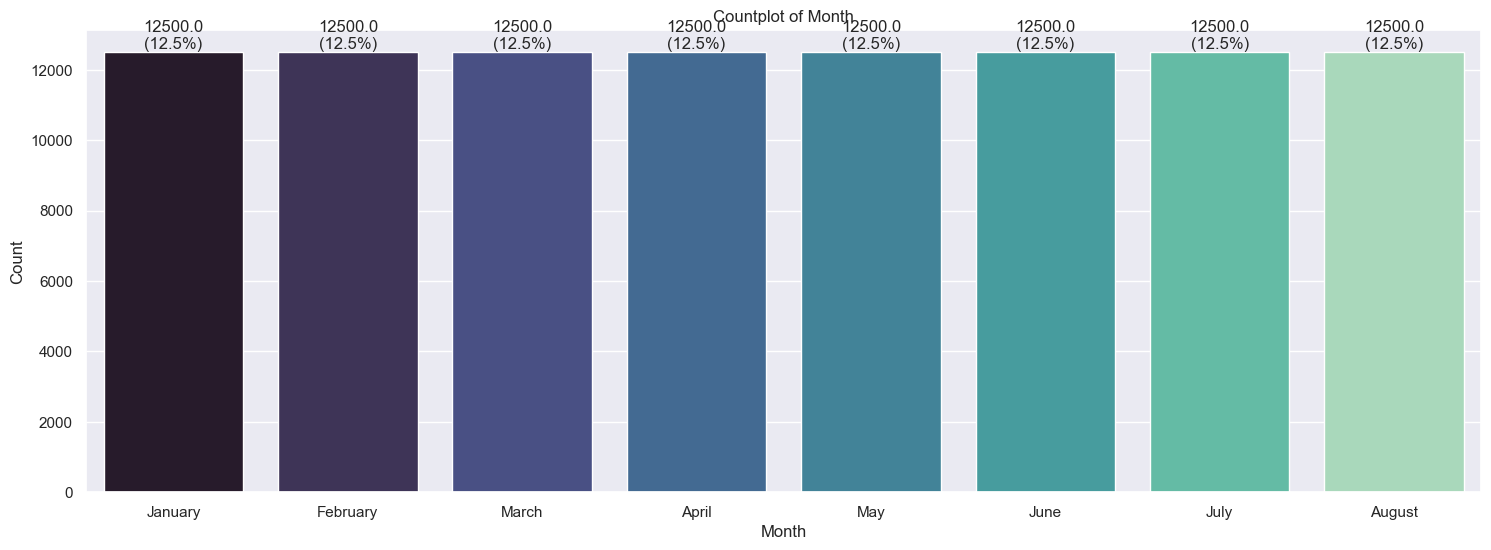

In [301]:
fig, ax = plt.subplots(figsize=(18, 6))
single_countplot(df, x='Month', ax=ax)
plt.show()

The distribution of each Month are equal for all months, but the September, October, November, December were not included.

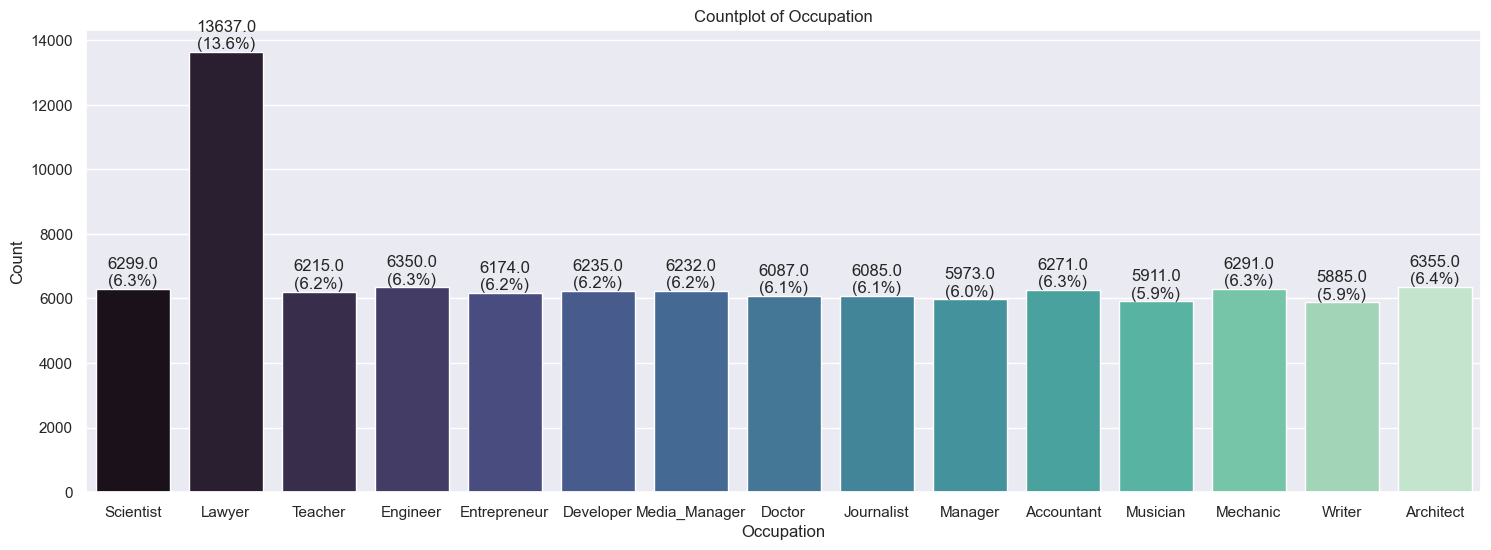

In [302]:
fig, ax = plt.subplots(figsize=(18, 6))
single_countplot(df, x='Occupation', ax=ax)
plt.show()

Highest occupation is Lawyer among others.

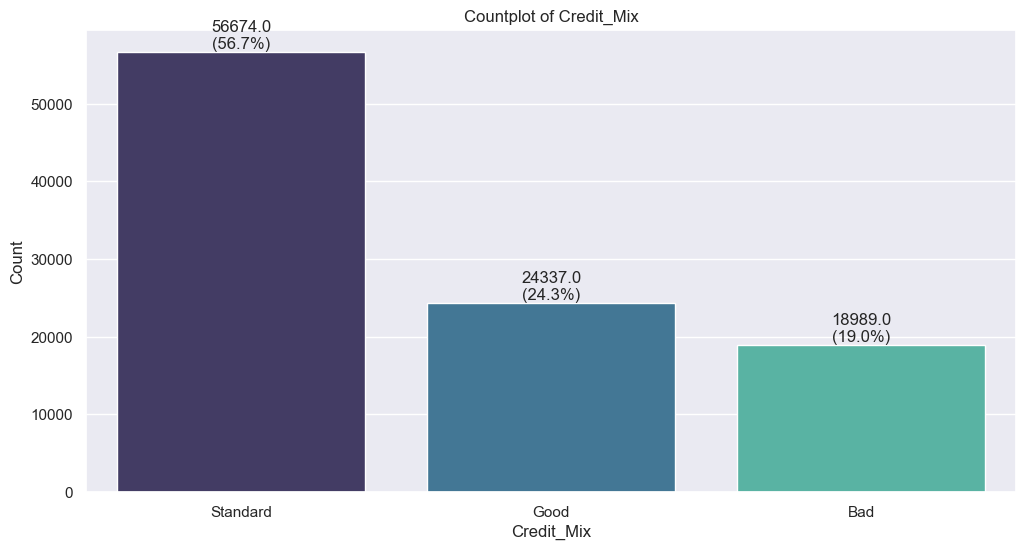

In [303]:
fig, ax = plt.subplots(figsize=(12, 6))
single_countplot(df, x='Credit_Mix', ax=ax)
plt.show()

The standard has majority among others for almost half of it.

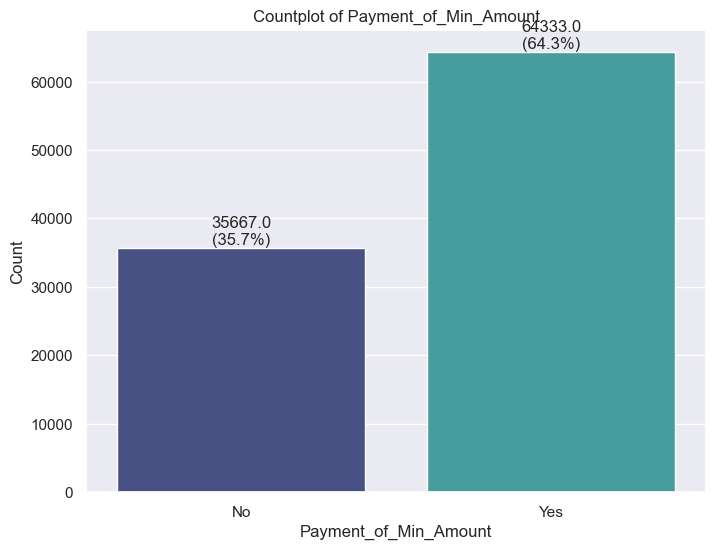

In [304]:
fig, ax = plt.subplots(figsize=(8, 6))
single_countplot(df, x='Payment_of_Min_Amount', ax=ax)
plt.show()

Almost more than half of debtor like to do minimum payment for their credit card due date.

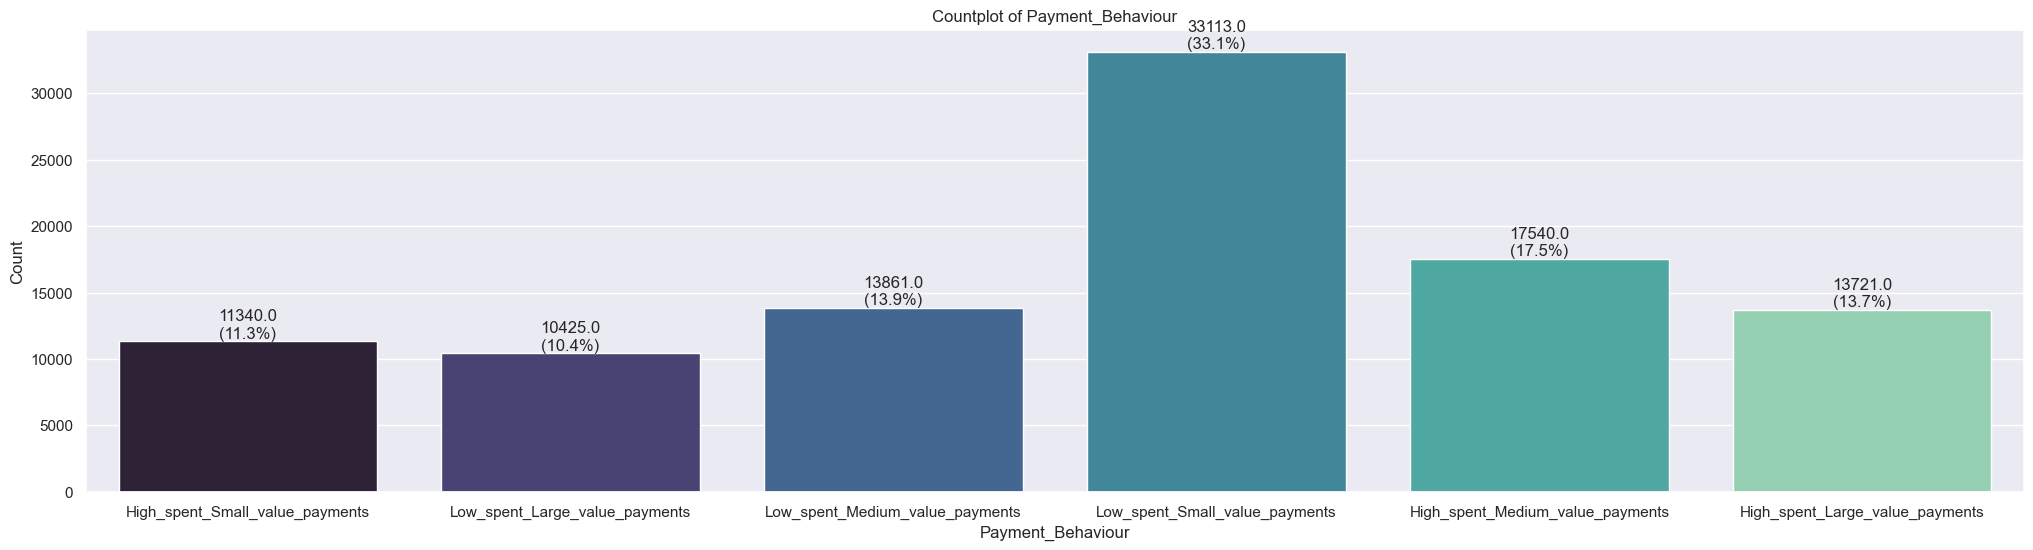

In [305]:
fig, ax = plt.subplots(figsize=(25, 6))
single_countplot(df, x='Payment_Behaviour', ax=ax)
plt.show()

Mostly borrower for one-third like to have low spending and small payment.

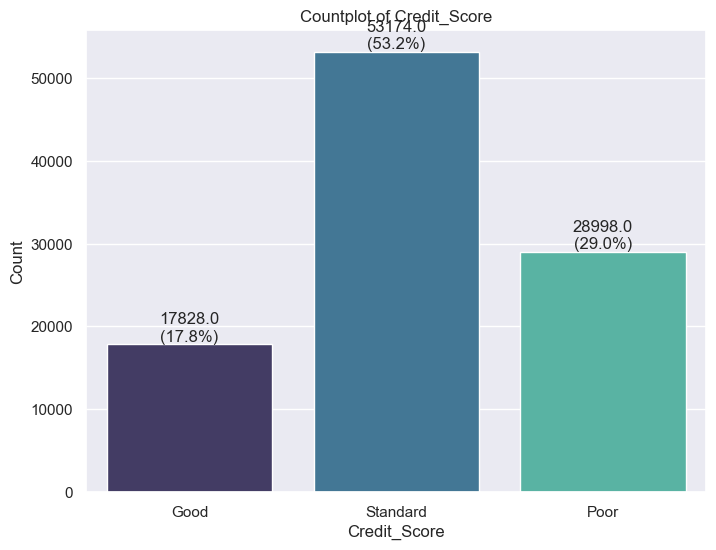

In [306]:
fig, ax = plt.subplots(figsize=(8, 6))
single_countplot(df, x='Credit_Score', ax=ax)
plt.show()

For half of them have standard credit score, meanwhile 29% of debtors have Poor Score and 17.8% have Good Score

# Deep-Dive EDA

For example, your bank account balance doesn’t appear on your credit report. Neither does your income or your net worth. None of these factors play a role when a scoring model calculates your credit score.

Factors that do impact your FICO Score fall into one of the following five categories.
1. Payment History: 35% <br>
A single 30-day late payment might not destroy your credit score if the rest of your report is in good shape, though you should expect some damage. But if you have multiple late payments or more severe late payments (e.g., 60 days late or worse), your scores might take a harder hit.
2. Amounts Owed: 30% <br>
Paying down your credit card balances is always wise—potentially good for both your credit score and your bank account. Yet as long as you’re on time with your large installment loans like mortgages, auto loans and student loans, the balances on these accounts probably won’t have much impact on your credit score.
3. Length of Credit History: 15% <br>
Many people simply have to wait for time to do its magic when it comes to their length of credit history. However, if you have a loved one with an older, well-managed credit card account, you might be able to speed up the process.
If someone you know is willing to add you as an authorized user to an existing credit card, the account might show up on your credit reports. Assuming the account is older (with no late payments and low credit utilization), it could help lengthen your average age of credit and potentially give your credit score a boost.
4. New Credit: 10% <br>
One of the factors considered in this category is how many recent inquiries (a.k.a. credit checks) show up on your report.
When you apply for new credit, and a lender checks a copy of your credit report, this is known as a hard inquiry. Hard inquiries appear on your credit report for 24 months. Some hard inquiries may hurt your credit score for up to 12 months, but others may be ignored.
5. Credit Mix: 10% <br>
A scoring model may ask whether the following types of accounts show up on your report:
* Credit Cards
* Installment Loans
* Retail Accounts
* Mortgage Loans
* Finance Company Accounts

Source: https://www.forbes.com/advisor/credit-score/what-makes-up-your-credit-score/

What Isn’t in Your Score
The following information is not considered in determining your credit score, according to FICO:

* Marital status
* Age (though FICO says some other types of scores may consider this)
* Race, color, religion, and national origin
* Receipt of public assistance
* Salary
* Occupation, employment history, and employer (though lenders and other scores may consider this)
* Where you live
* Child/family support obligations
* Any information not found in your credit report
* Participation in a credit counseling program

Source: https://www.investopedia.com/articles/pf/10/credit-score-factors.asp

**As the data shown:**

A. Include in a FICO-like Model:
1. Payment History/Behaviour:
* Payment_of_Min_Amount, Total_EMI_per_month, Payment_Behaviour: These factors can provide insights into the individual's payment behavior and financial responsibility.
2. Credit Utilization:
* Outstanding_Debt, Changed_Credit_Limit, Credit_Utilization_Ratio: These factors are important in understanding how the individual manages their credit accounts and balances.
3. Credit History:
* Credit_History_months: The length of the individual's credit history can be a key factor in credit scoring.
* Delay_from_due_date, Num_of_Delayed_Payment: The delay in payment from the due date for loans or credit payments.
4. Credit Inquiries:
* Num_Credit_Inquiries: The inquiries of credit whenever new credit account opened
5. Type of Loan (Account Mix):
* Num_of_Loan, Type_of_Loan, : These factors related type of loan are relevant for assessing credit

B. Alternate Data
1. Investing Information:
* Amount_invested_monthly: While investing information is not typically included in FICO scores, it could potentially provide additional insights into financial stability.
2. Demographic Information:
* Name, Age, SSN, Occupation, Annual_Income, Monthly_Inhand_Salary: FICO scores do not typically include demographic and income-related information, as they focus primarily on credit behavior.
3. Credit  Information:
* Num_Bank_Accounts, Num_Credit_Card: These factors represent the number of bank accounts and credit cards held by the individual, which could be indicative of their credit behavior.
* Monthly_Balance: This factor indicates the balance maintained by the individual, which can reflect their financial stability.
* Interest_Rate: Interest rate on financial products can reflect the individual's credit risk. Also, after did labeling credit scoring to borrower, lenders will determine interest rate based on the score
* Month: The month data is queried

C. Target Variable:
* Credit_Score: Simplified into Poor, Standard and Good

## A. Payment Behaviour/History: Payment_of_Min_Amount, Total_EMI_per_month, Payment_Behaviour

### A.1. How is the proportion of Minimum Amount Payment?

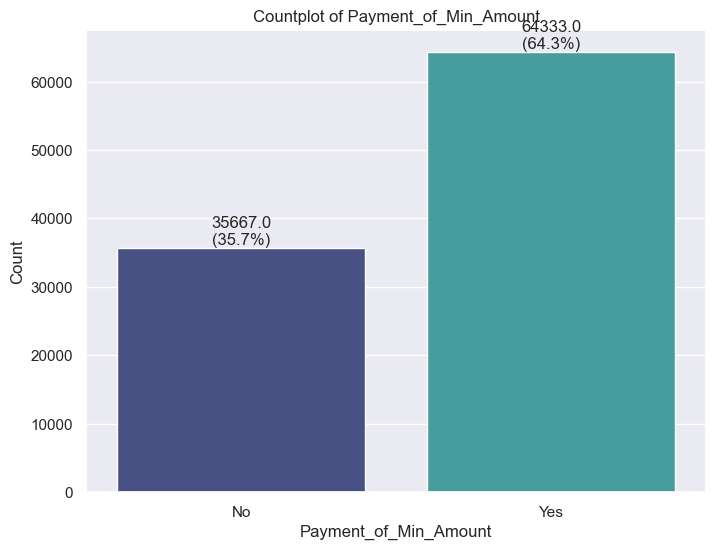

In [332]:
fig, ax = plt.subplots(figsize=(8, 6))
single_countplot(df, x='Payment_of_Min_Amount', ax=ax)
plt.show()

Majority of borrower did payment of minimum amount which indicates they can't do full payment but still want to maintain a good credit score.

In [308]:
def lineplot_hue(dataframe, x, y, hue):
    plt.figure(figsize=(20, 6))
    
    # Plot a line plot
    sns.lineplot(x=x, y=y, data=dataframe, hue=hue, palette ='mako')
    plt.title(f'Relationship between {x} and {y} by {hue}', fontsize=16, fontweight='bold')
    plt.xlabel(x, fontsize=12)
    plt.ylabel(y, fontsize=12)
    plt.legend(title=hue)
    plt.grid(color='white', linestyle='-', linewidth=2, alpha=0.5)
    
    # Show the plot
    plt.show()

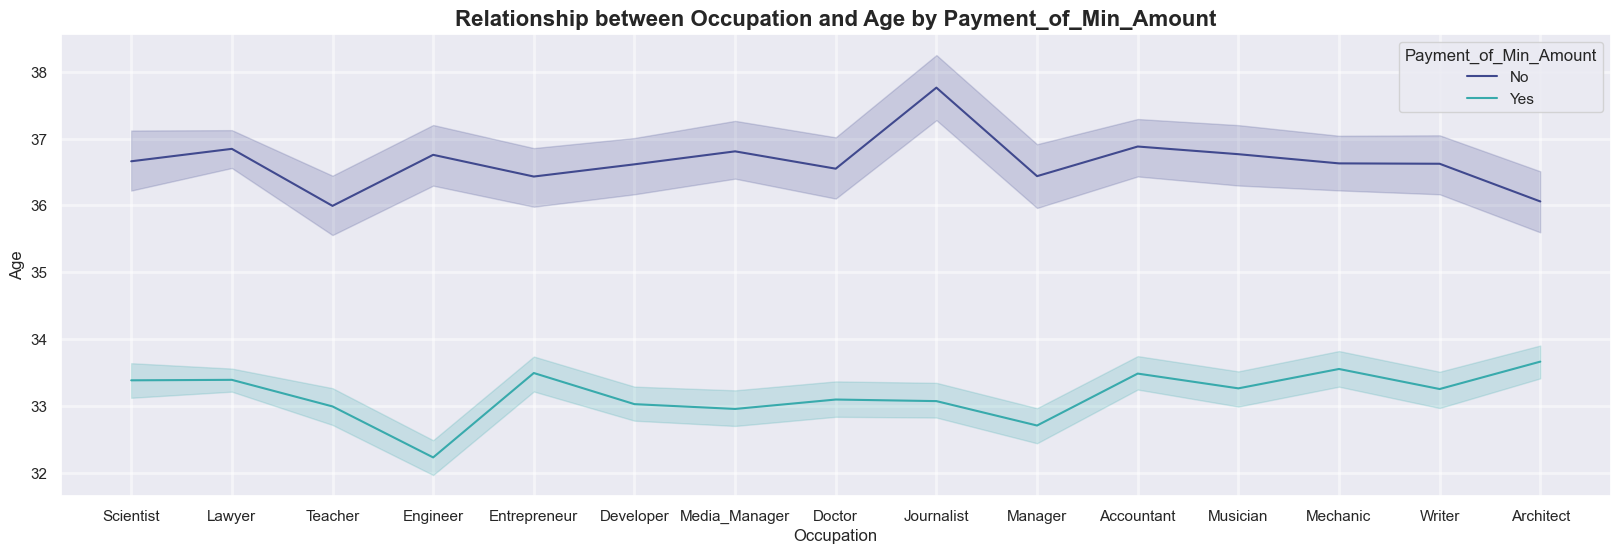

In [309]:
lineplot_hue(df, 'Occupation', 'Age', 'Payment_of_Min_Amount')

It appears that younger borrower tend to be more willing to make payments with minimal amounts, which indicate they are have difficulty to pay, and vice versa.

### A.2. How is the proportion of EMI per month?  

In [188]:
# Limit the 'Total_EMI_per_month' column to the range 0 to 356
EMI_bin = df.copy()
EMI_bin['Total_EMI_per_month'] = EMI_bin['Total_EMI_per_month'].clip(lower=0, upper=360)

# ranging into 6 of the Total_EMI_per_month
bins = [0, 60, 120, 180, 240, 300, 360]

# Create 'delay_date' column and group by it in one line
EMI_bin['Total_EMI_per_month'] = pd.cut(EMI_bin['Total_EMI_per_month'], bins=bins, right=False)

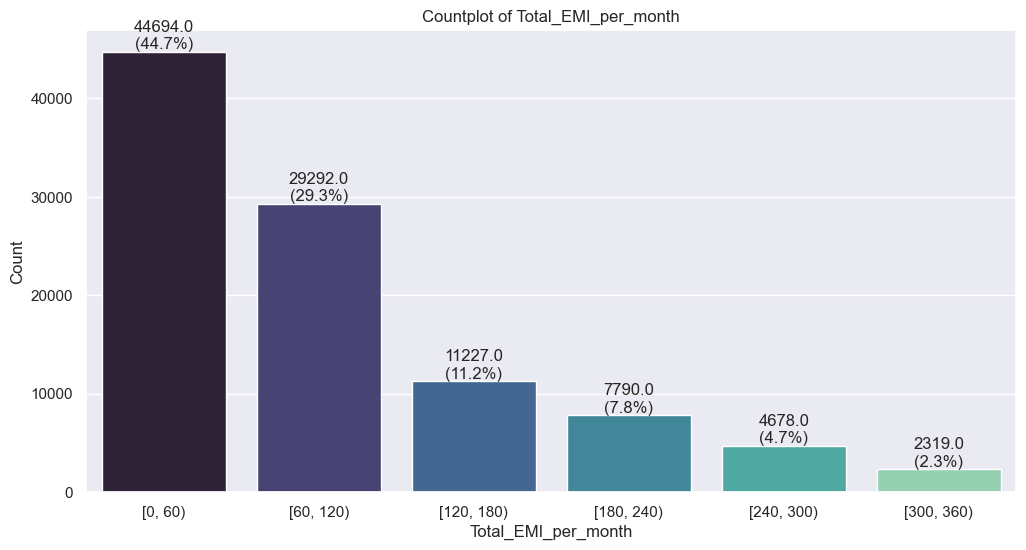

In [333]:
fig, ax = plt.subplots(figsize=(12, 6))
single_countplot(EMI_bin, x='Total_EMI_per_month', ax=ax)
plt.show()

Almost half of the borrower did payment with small installment (0-60 total EMI per month).

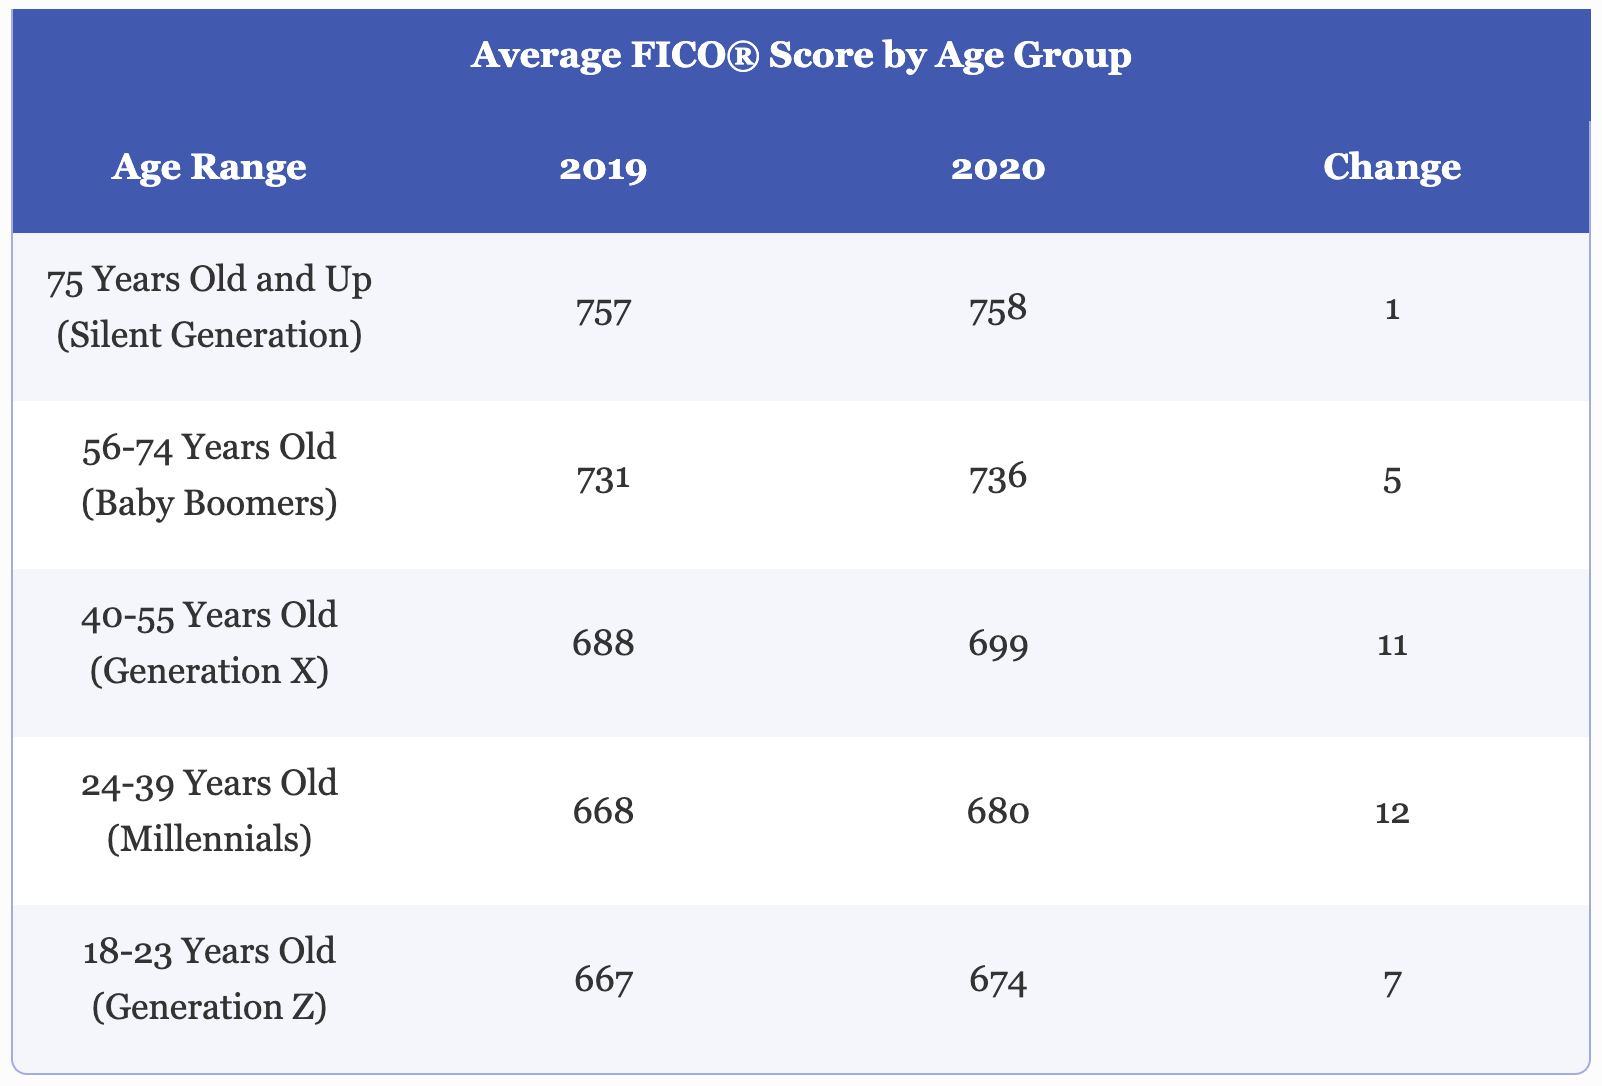

Grouping age based on figure above.

In [198]:
age_bin = df.copy()

# ranging into 5 of the Delay_from_due_date
bins = [18, 24, 40, 56, 75, 100]

# Create 'delay_date' column and group by it in one line
age_bin['Age'] = pd.cut(age_bin['Age'], bins=bins, right=False)

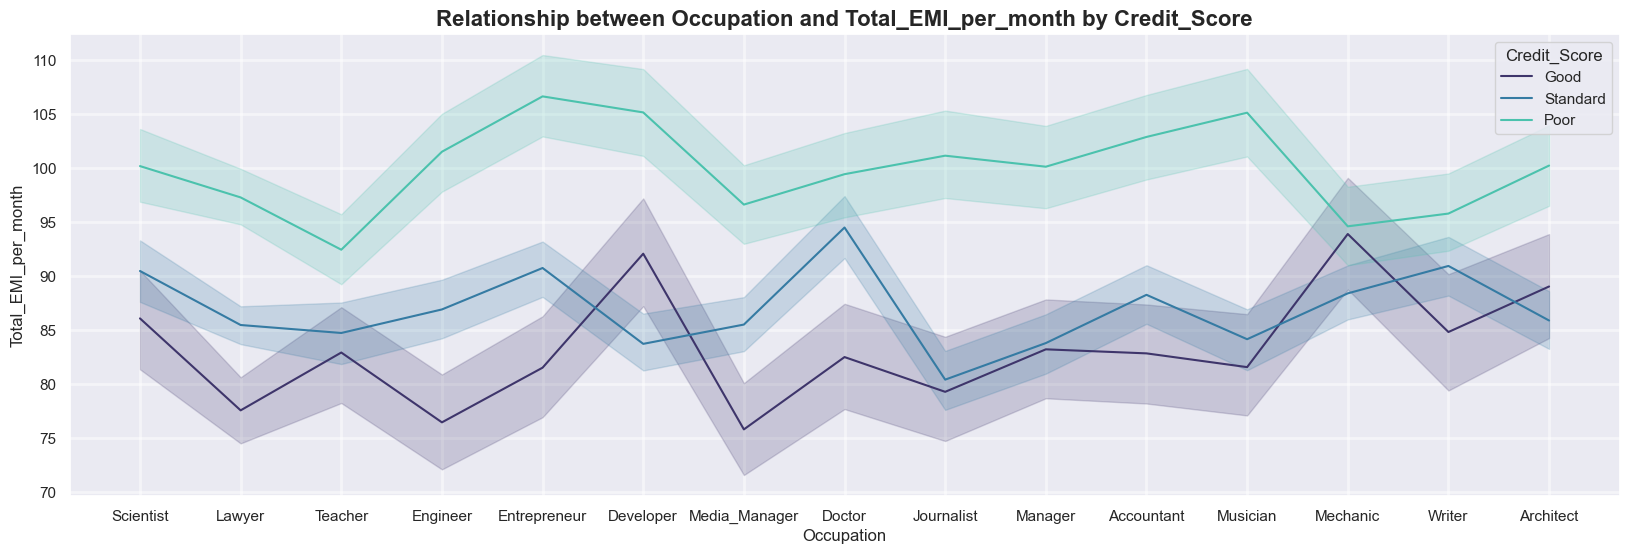

In [311]:
lineplot_hue(age_bin, 'Occupation', 'Total_EMI_per_month', 'Credit_Score')

The figure shows that have high installment per month tend to have poor credit score, however it also depend on the borrower case, which other factor like debt-to-income ratio could show if the borrower have a good score  or not.

### A.3. How is the distribution of Payment Behaviour?  

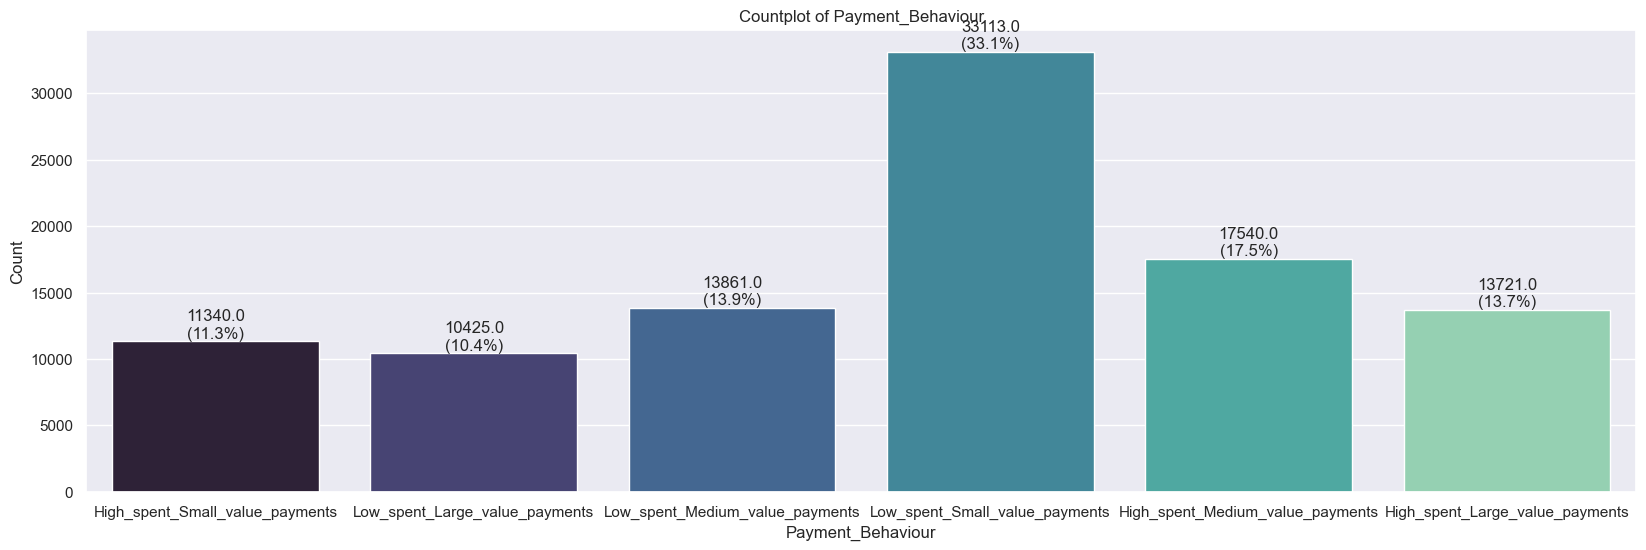

In [312]:
fig, ax = plt.subplots(figsize=(20, 6))
single_countplot(df, x='Payment_Behaviour', ax=ax)
plt.show()

The figures shows one of third borrower did low spent credit things but also they did small value payment which indicate almost one of third borrower might be considered "good" borrowers. 
However for other type of payment behaviour could enrich the analysis with other variables.

## B. Amounts Owed/Credit Utilization: Outstanding_Debt

### How severe outstanding debt affect Credit Score based on their occupation?

In [202]:
df.Outstanding_Debt.describe()

count    100000.000000
mean       1426.503700
std        1149.203715
min           0.230000
25%         571.650000
50%        1175.880000
75%        1933.430000
max        4998.070000
Name: Outstanding_Debt, dtype: float64

In [203]:
# Limit the 'Outstanding_Debt' column to the range 0 to 5000
debt_bin = df.copy()
debt_bin['Outstanding_Debt'] = debt_bin['Outstanding_Debt'].clip(lower=0, upper=5000)

# ranging into 5 of the Outstanding_Debt
bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]

# Create 'delay_date' column and group by it in one line
debt_bin['Outstanding_Debt'] = pd.cut(debt_bin['Outstanding_Debt'], bins=bins, right=False)

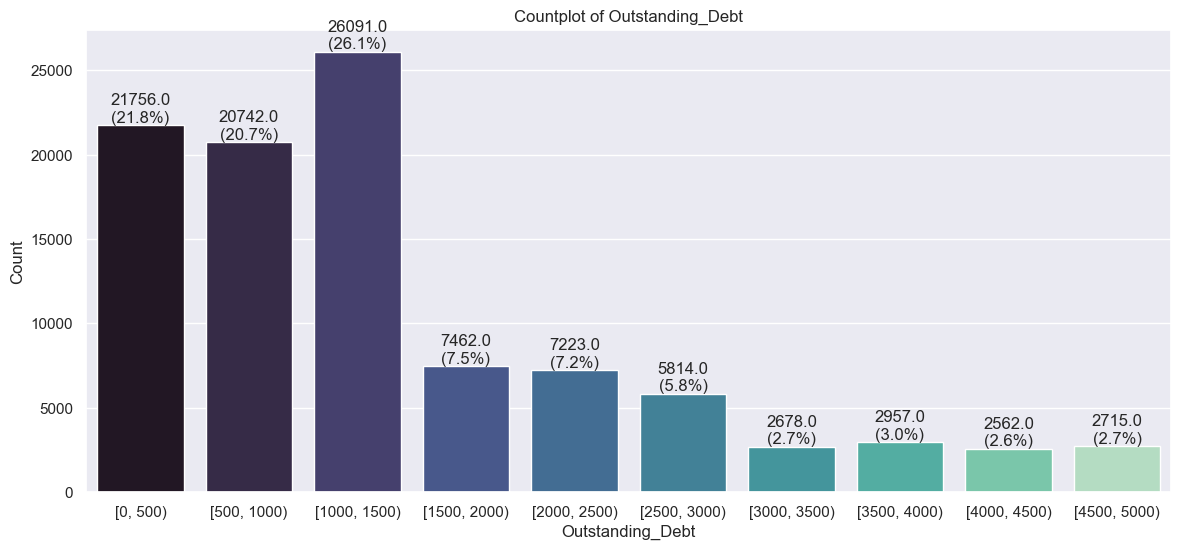

In [313]:
fig, ax = plt.subplots(figsize=(14, 6))
single_countplot(debt_bin, x='Outstanding_Debt', ax=ax)
plt.show()

Almost <70% of borrower have low outstanding debt in range 0-1500 (30%), this indicate majority have low outstanding debt.

In [205]:
cat_opp_debt = df.groupby(['Occupation', 'Credit_Score']).agg(total_debt=('Outstanding_Debt', 'sum')).reset_index()

cat_opp_debt.head(5)

,Occupation,Credit_Score,total_debt
0,Accountant,Good,9.244590e+05
1,Accountant,Poor,3.869840e+06
2,Accountant,Standard,4.179699e+06
3,Architect,Good,7.982462e+05
4,Architect,Poor,3.650967e+06


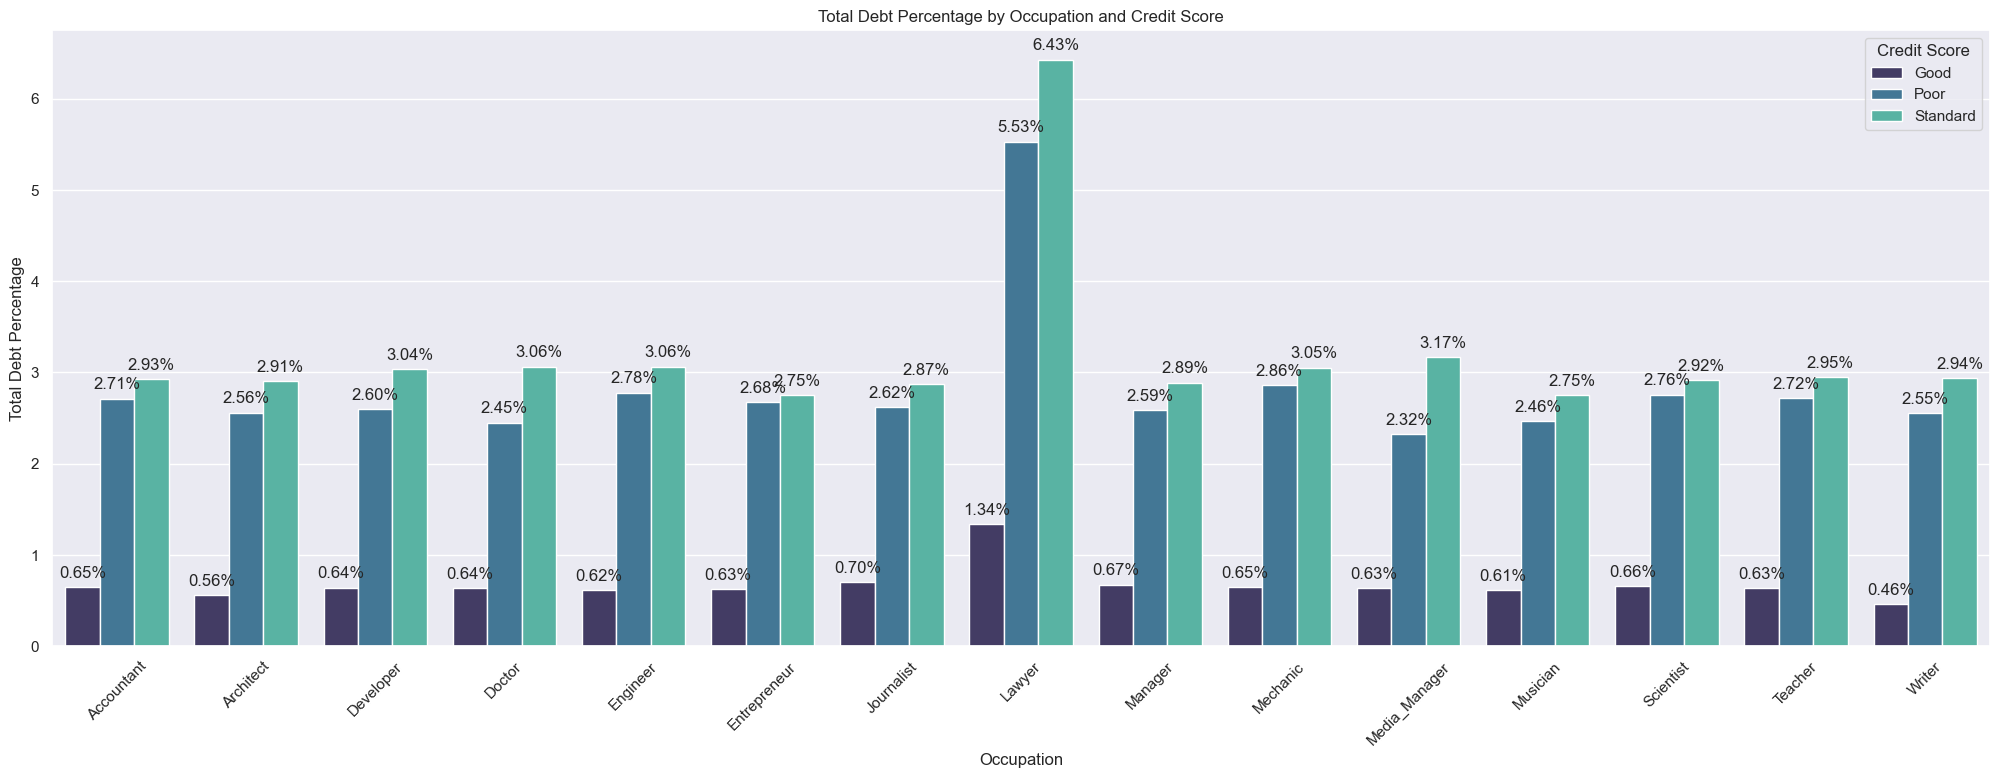

In [315]:
# Convert debt values to percentage
cat_opp_debt['total_debt_percent'] = cat_opp_debt['total_debt'] / cat_opp_debt['total_debt'].sum() * 100

# Set the figure size
plt.figure(figsize=(25, 8))

# Create the bar plot using sns.barplot
ax = sns.barplot(data=cat_opp_debt, x='Occupation', y='total_debt_percent', hue='Credit_Score', palette='mako')

# Set the title and axis labels
plt.title('Total Debt Percentage by Occupation and Credit Score')
plt.xlabel('Occupation')
plt.ylabel('Total Debt Percentage')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend with a title for the credit score categories
plt.legend(title='Credit Score')

# Display the actual percentage values above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Display the plot
plt.show()

From the figure among the poor, standard, and good, the lawyer has highest total debt among others which lead them into poor and standard score.

## C. Length of Credit History (15%) : Credit_History_Age

### C.1. What age of people that have most long credit history for each Credit Score type?

In [207]:
# grouping into 6 binning
credhist_byage = age_bin.groupby(['Credit_Score', 'Age']).agg(
    credhist_months_mean=('Credit_History_months', 'mean'),
    credhist_months_median=('Credit_History_months', 'median')).reset_index()

In [208]:
credhist_byage

,Credit_Score,Age,credhist_months_mean,credhist_months_median
0,Good,"[18, 24)",277.152996,272.000000
1,Good,"[24, 40)",274.629174,273.000000
2,Good,"[40, 56)",285.230967,283.000000
3,Good,"[56, 75)",297.914661,314.500000
4,Good,"[75, 100)",221.195405,221.195405
5,Poor,"[18, 24)",173.657724,169.000000
6,Poor,"[24, 40)",167.125733,164.000000
7,Poor,"[40, 56)",195.539284,200.000000
8,Poor,"[56, 75)",257.029886,258.000000
9,Poor,"[75, 100)",NaN,NaN


/var/folders/17/pn2fwypx1qg13h_pjbf0t1ch0000gn/T/ipykernel_6478/1816288562.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credhist_byage_cleaned['credhist_months_mean'] = pd.to_numeric(credhist_byage_cleaned['credhist_months_mean'], errors='coerce')
/var/folders/17/pn2fwypx1qg13h_pjbf0t1ch0000gn/T/ipykernel_6478/1816288562.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credhist_byage_cleaned['credhist_months_mean'].replace([np.inf, -np.inf], np.nan, inplace=True)
posx and posy should be finite values
posx and posy should be finite values


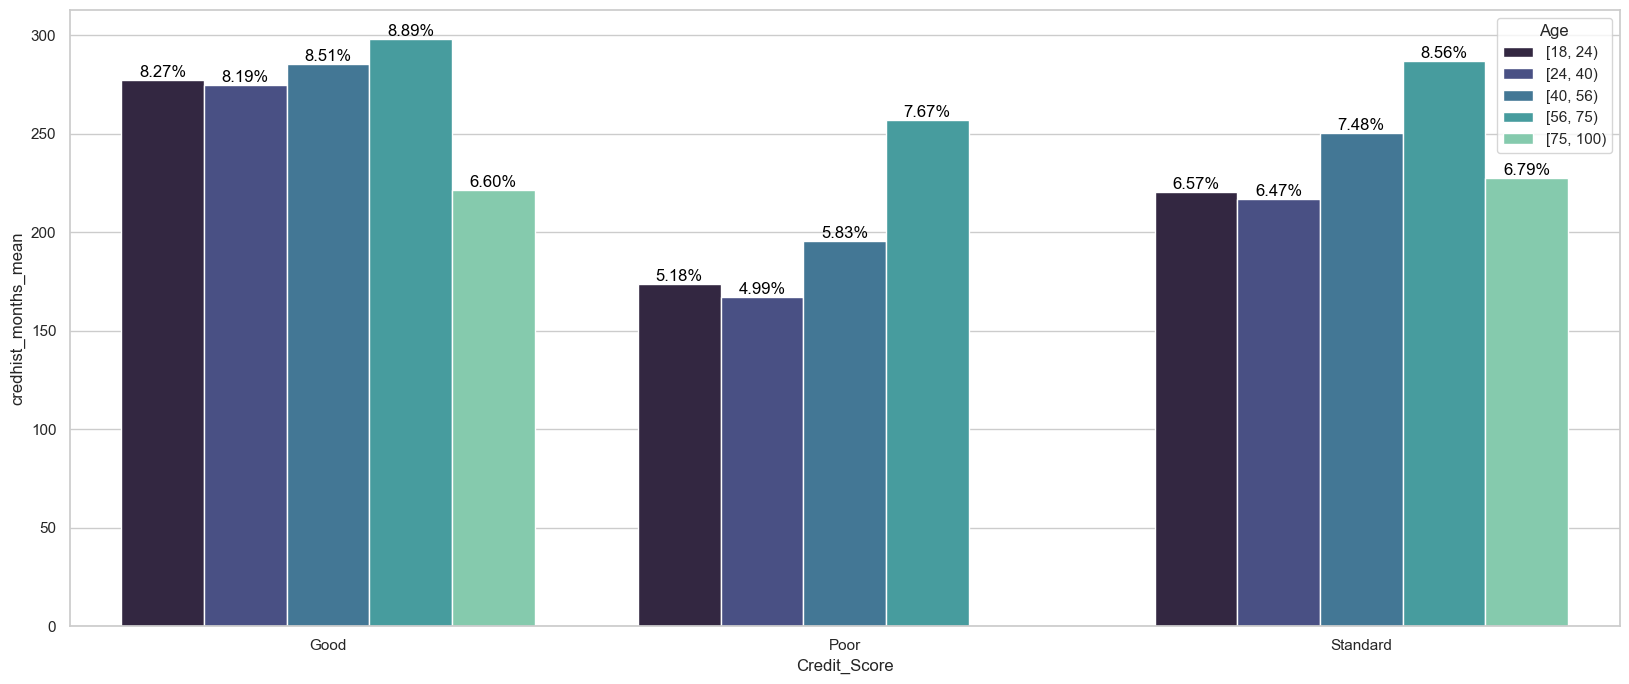

In [316]:
# Drop rows with missing values in 'credhist_months_mean' and 'Credit_Score' columns
credhist_byage_cleaned = credhist_byage.dropna(subset=['credhist_months_mean', 'Credit_Score'])

# Convert 'credhist_months_mean' column to numeric type (if not already)
credhist_byage_cleaned['credhist_months_mean'] = pd.to_numeric(credhist_byage_cleaned['credhist_months_mean'], errors='coerce')

# Replace infinite values in 'credhist_months_mean' column with NaN
credhist_byage_cleaned['credhist_months_mean'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Calculate total
total = sum(credhist_byage_cleaned['credhist_months_mean'])

# Set the style
sns.set_style("whitegrid")
plt.figure(figsize=(20, 8))

# Create the barplot
bar_plot = sns.barplot(x='Credit_Score', y='credhist_months_mean', hue='Age', data=credhist_byage_cleaned, palette ='mako')

# Add the percentage values on top of each bar
for p in bar_plot.patches:
    height = p.get_height()
    # Calculate percentage
    percentage = 100 * height / total
    bar_plot.text(p.get_x() + p.get_width() / 2., height,
                  '{:1.2f}%'.format(percentage),
                  fontsize=12, color='black', ha='center', va='bottom')

plt.show()

As seen in the graph the longest credit history is own by elder customer (Above 55) among all scores. Unfortunately the age is dont have correlation to credit history age because the elder has majority among other ages. However is it true that have long credit history tend to have good credit score.

### C.2. How severe delay of due date affect for last 30 days, 60 days & 90 days?

In [210]:
category = df.groupby(['Delay_from_due_date']).agg(
    total_delayed=('Num_of_Delayed_Payment', 'sum')).reset_index()

In [211]:
# ranging into 6 of the Delay_from_due_date
bins = [0, 30, 60, 90]
# Create 'delay_date' column and group by it in one line
category['delay_date'] = pd.cut(category['Delay_from_due_date'], bins=bins, right=False)

# grouping into 6 binning
group_delayed = category.groupby(['delay_date']).agg(
    total_delayed=('total_delayed', 'sum')).reset_index()

In [212]:
# Convert the 'delay_date' column to string and then replace the format
group_delayed['delay_date'] = group_delayed['delay_date'].astype(str)
group_delayed['delay_date'] = group_delayed['delay_date'].str.replace(r'\[(\d+), (\d+)\)', r'\1-\2')

/var/folders/17/pn2fwypx1qg13h_pjbf0t1ch0000gn/T/ipykernel_6478/3601892981.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  group_delayed['delay_date'] = group_delayed['delay_date'].str.replace(r'\[(\d+), (\d+)\)', r'\1-\2')


In [213]:
group_delayed

,delay_date,total_delayed
0,0-30,928766.668803
1,30-60,306518.389222
2,60-90,29950.667707


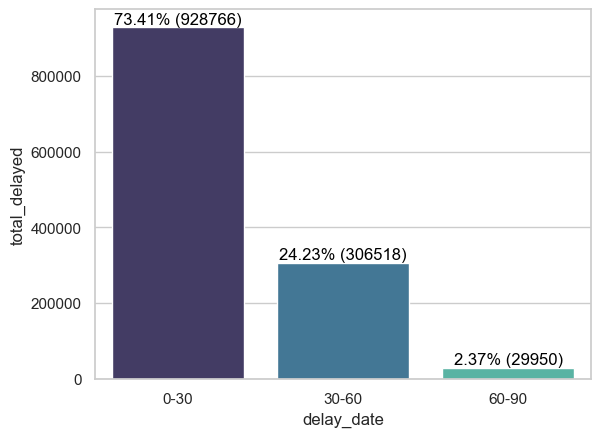

In [317]:
# Set the style
sns.set_style("whitegrid")

# Create the barplot
bar_plot = sns.barplot(x='delay_date', y='total_delayed', data=group_delayed, palette ='mako')

# Calculate total
total = sum(group_delayed['total_delayed'])

# Add the values and percentages on top of each bar
for p in bar_plot.patches:
    height = p.get_height()
    # Calculate percentage
    percentage = 100 * height / total
    bar_plot.text(p.get_x() + p.get_width()/2., height, 
            '{:1.2f}% ({})'.format(percentage, int(height)), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

Mostly approximately 72% of borrowers continue to keep their overdue payments within one month, indicating that the majority follow payment rules in order to maintain a good credit score.

There's no significant different between months for each type of delay date.

## D. New Credit/Inquiries (10%): Num_Credit_Inquiries


### What type of payment behaviour that trigger to open new credit (highest hard inquiry) for each Credit Score type?

In [216]:
behaviour_inquiry = df.groupby(['Credit_Score', 'Payment_Behaviour']).agg(total_inquiries=('Num_Credit_Inquiries', 'sum')).reset_index()
behaviour_inquiry = behaviour_inquiry[behaviour_inquiry['Payment_Behaviour'] != '!@9#%8'].reset_index(drop=True)

behaviour_inquiry

,Credit_Score,Payment_Behaviour,total_inquiries
0,Good,High_spent_Large_value_payments,10639.798444
1,Good,High_spent_Medium_value_payments,12051.390735
2,Good,High_spent_Small_value_payments,7220.021570
3,Good,Low_spent_Large_value_payments,6637.021570
4,Good,Low_spent_Medium_value_payments,8284.643918
5,Good,Low_spent_Small_value_payments,15387.008840
6,Poor,High_spent_Large_value_payments,21623.111739
7,Poor,High_spent_Medium_value_payments,34873.605374
8,Poor,High_spent_Small_value_payments,25034.485148
9,Poor,Low_spent_Large_value_payments,23660.768387


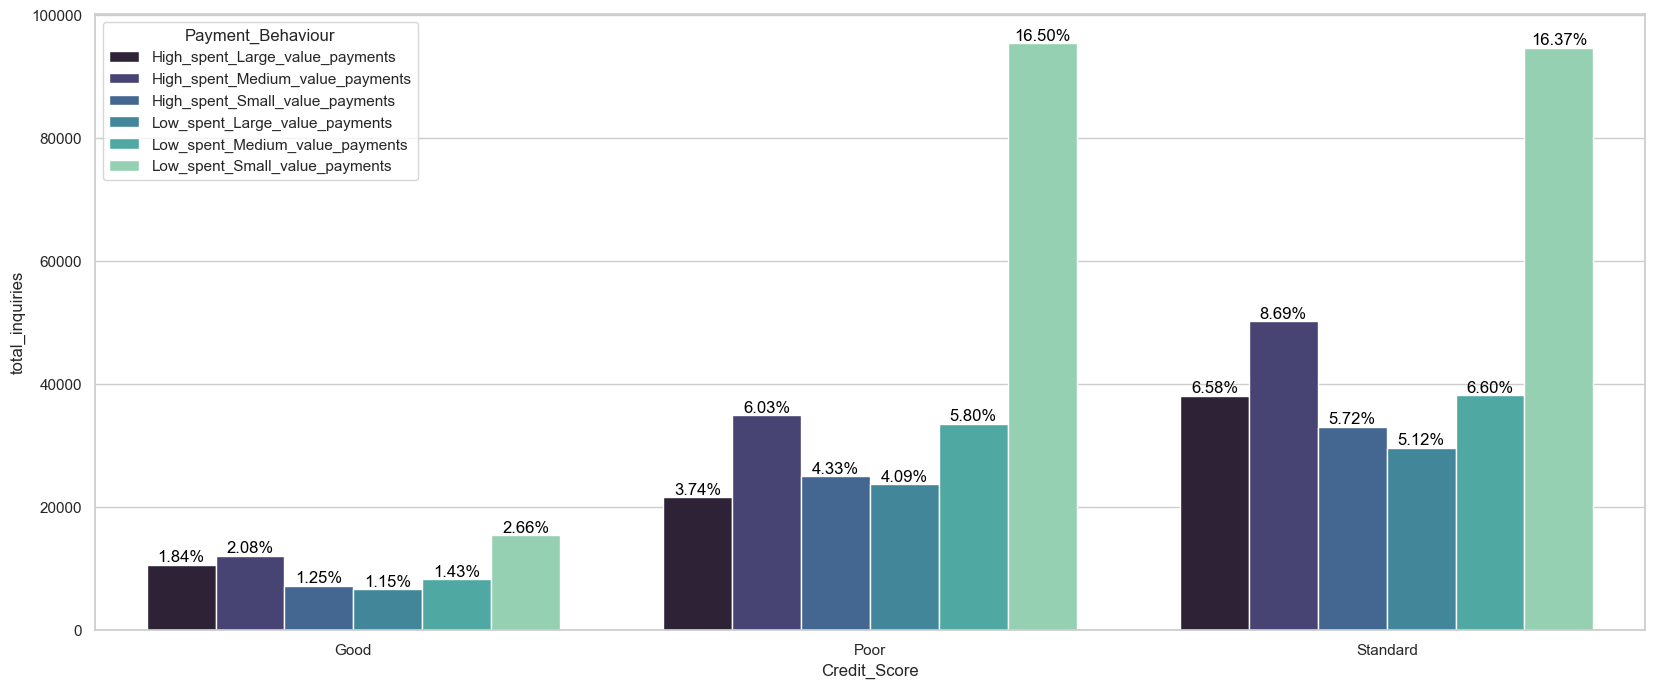

In [318]:
# Set the style
sns.set_style("whitegrid")
plt.figure(figsize=(20, 8))

# Create the barplot
bar_plot = sns.barplot(x='Credit_Score', y='total_inquiries', hue='Payment_Behaviour', data=behaviour_inquiry, palette ='mako')

# Calculate total
total = sum(behaviour_inquiry['total_inquiries'])

# Add the percentage values on top of each bar
for p in bar_plot.patches:
    height = p.get_height()
    # Calculate percentage
    percentage = 100 * height / total
    bar_plot.text(p.get_x() + p.get_width() / 2., height,
                  '{:1.2f}%'.format(percentage),
                  fontsize=12, color='black', ha='center', va='bottom')

plt.show()

Many new credit cards are released to borrowers who have low spending habits and make small payments, resulting in poor or standard credit scores. This indicates that having a lot of new credit card could lead to lower credit score.

## E. Type of Loan/Credit Mix 10%: Type_of_Loan

### What is the largest type of loan taken by borrower?

In [218]:
# grouping Num_of_Loan by loan type 
installment_typeloan = df.groupby(['Type_of_Loan']).agg(tot_installment_month=('Num_of_Loan', 'sum')).reset_index()
installment_typeloan_list = installment_typeloan.Type_of_Loan.unique().tolist()

In [219]:
from collections import Counter

# Remove "and" from the elements of the list using list comprehension
installment_typeloan_list = [item.replace('and ', '') for item in installment_typeloan_list]

# Split each item into individual loan types (assuming items are comma-separated strings)
loan_types = [item.split(', ') for item in installment_typeloan_list]

# Flatten the list of loan types into a single list
flattened_list = [loan for sublist in loan_types for loan in sublist]

# Calculate the count of each loan type using Counter
loan_type_count = Counter(flattened_list)

# Convert the Counter to a list of tuples
loan_counts_list = list(loan_type_count.items())

# Create a pandas DataFrame from the list of tuples
typeloan_df = pd.DataFrame(loan_counts_list,
                           columns=['Loan_Type',
                                    'Num_Loan_Type']).sort_values(by='Num_Loan_Type', ascending=False)

typeloan_df

,Loan_Type,Num_Loan_Type
5,Pydy_L,3938
1,CrBld_L,3929
6,NS,3792
8,HomEq_L,3780
2,Mrtg_L,3765
3,Prsnl_L,3765
4,Stdnt_L,3736
7,DebtCon_L,3725
0,Auto_L,3669


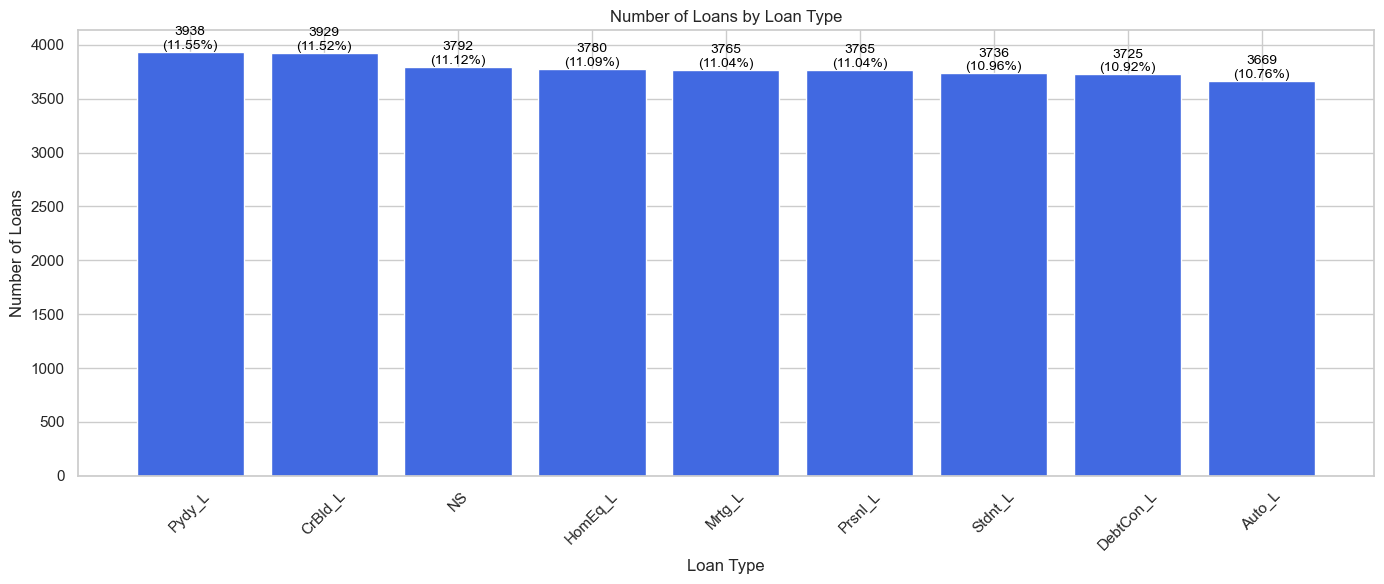

In [322]:
# Calculate the total number of loans
total_loans = typeloan_df['Num_Loan_Type'].sum()

# Calculate the percentage for each loan type
df_num_loantype = typeloan_df.copy()
df_num_loantype['Percentage'] = (typeloan_df['Num_Loan_Type'] / total_loans) * 100

# Create the bar plot
plt.figure(figsize=(14, 6))
bars = plt.bar(df_num_loantype['Loan_Type'], df_num_loantype['Num_Loan_Type'], color='royalblue')

# Annotate the bars with count and percentage values
for bar, count, percent in zip(bars, df_num_loantype['Num_Loan_Type'], df_num_loantype['Percentage']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{count}\n({percent:.2f}%)',
             ha='center', va='bottom', color='black', fontsize=10)

plt.xlabel('Loan Type')
plt.ylabel('Number of Loans')
plt.title('Number of Loans by Loan Type')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

The largest loan type that has taken by borrower is Payday Loan, however it has tight difference among others.

### What are top 5 account mix (type of loan) that have largest installment amount (Total_EMI_per_month) ? 

In [225]:
# grouping total EMI per month by loan type 
typeloan_occup = df.groupby(['Type_of_Loan']).agg(tot_installment_month=('Total_EMI_per_month', 'sum')).reset_index()

# filter top 20 of installment per month
top20_loantype = typeloan_occup.sort_values(by='tot_installment_month', ascending=False).head(20).reset_index(drop=True)

# convert tot_installment_month to integer
top20_loantype['tot_installment_month'] = top20_loantype['tot_installment_month'].astype(int)

top20_loantype

,Type_of_Loan,tot_installment_month
0,CrBld_L,210114
1,DebtCon_L,52887
2,Stdnt_L,52869
3,Mrtg_L,52356
4,Pydy_L,50828
5,Prsnl_L,50544
6,Auto_L,49250
7,HomEq_L,46844
8,"Prsnl_L, Stdnt_L",27541
9,"NS, Pydy_L",23783


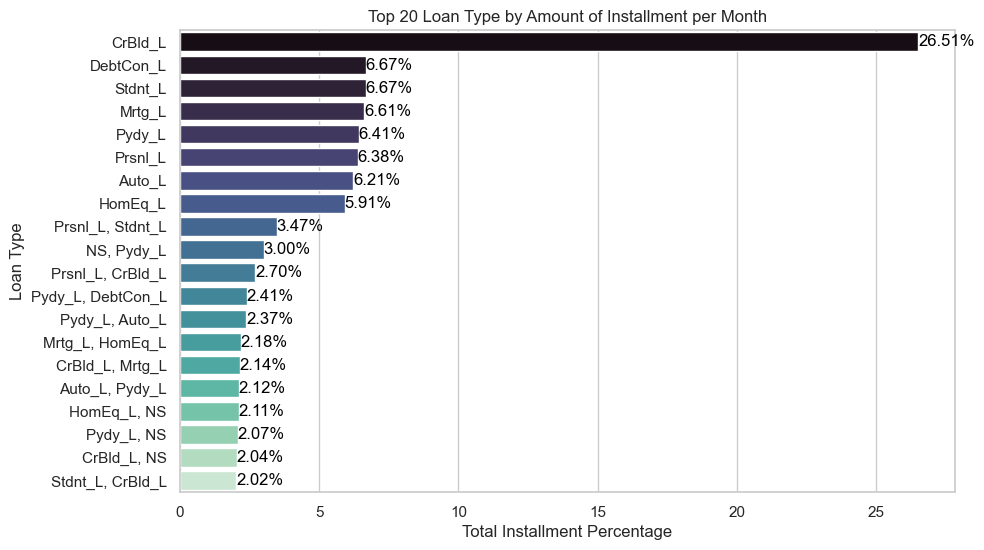

In [323]:
# Calculate the total sum of installment values
top20_total_sum = top20_loantype['tot_installment_month'].sum()

# Calculate the percentage for each installment value
top20_loantype['percentage'] = (top20_loantype['tot_installment_month'] / top20_total_sum) * 100

# Create the horizontal bar plot using Seaborn
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='percentage', y='Type_of_Loan', data=top20_loantype, orient='h', palette='mako')

# Add percentage labels to each bar
for index, percentage in enumerate(top20_loantype['percentage']):
    bar_plot.text(percentage, index, f'{percentage:.2f}%', color='black', ha="left", va="center")

# Set labels and title
plt.xlabel('Total Installment Percentage')
plt.ylabel('Loan Type')
plt.title('Top 20 Loan Type by Amount of Installment per Month')

# Show the plot
plt.show()

Top 1 type of loan that have largest installment per month is Credit Builder Loan. This indicates two possibilities: first, there are many new borrowers, or second, there are many borrowers attempting to repair their damaged credit scores.

## F. How to achieve good credit scoring?

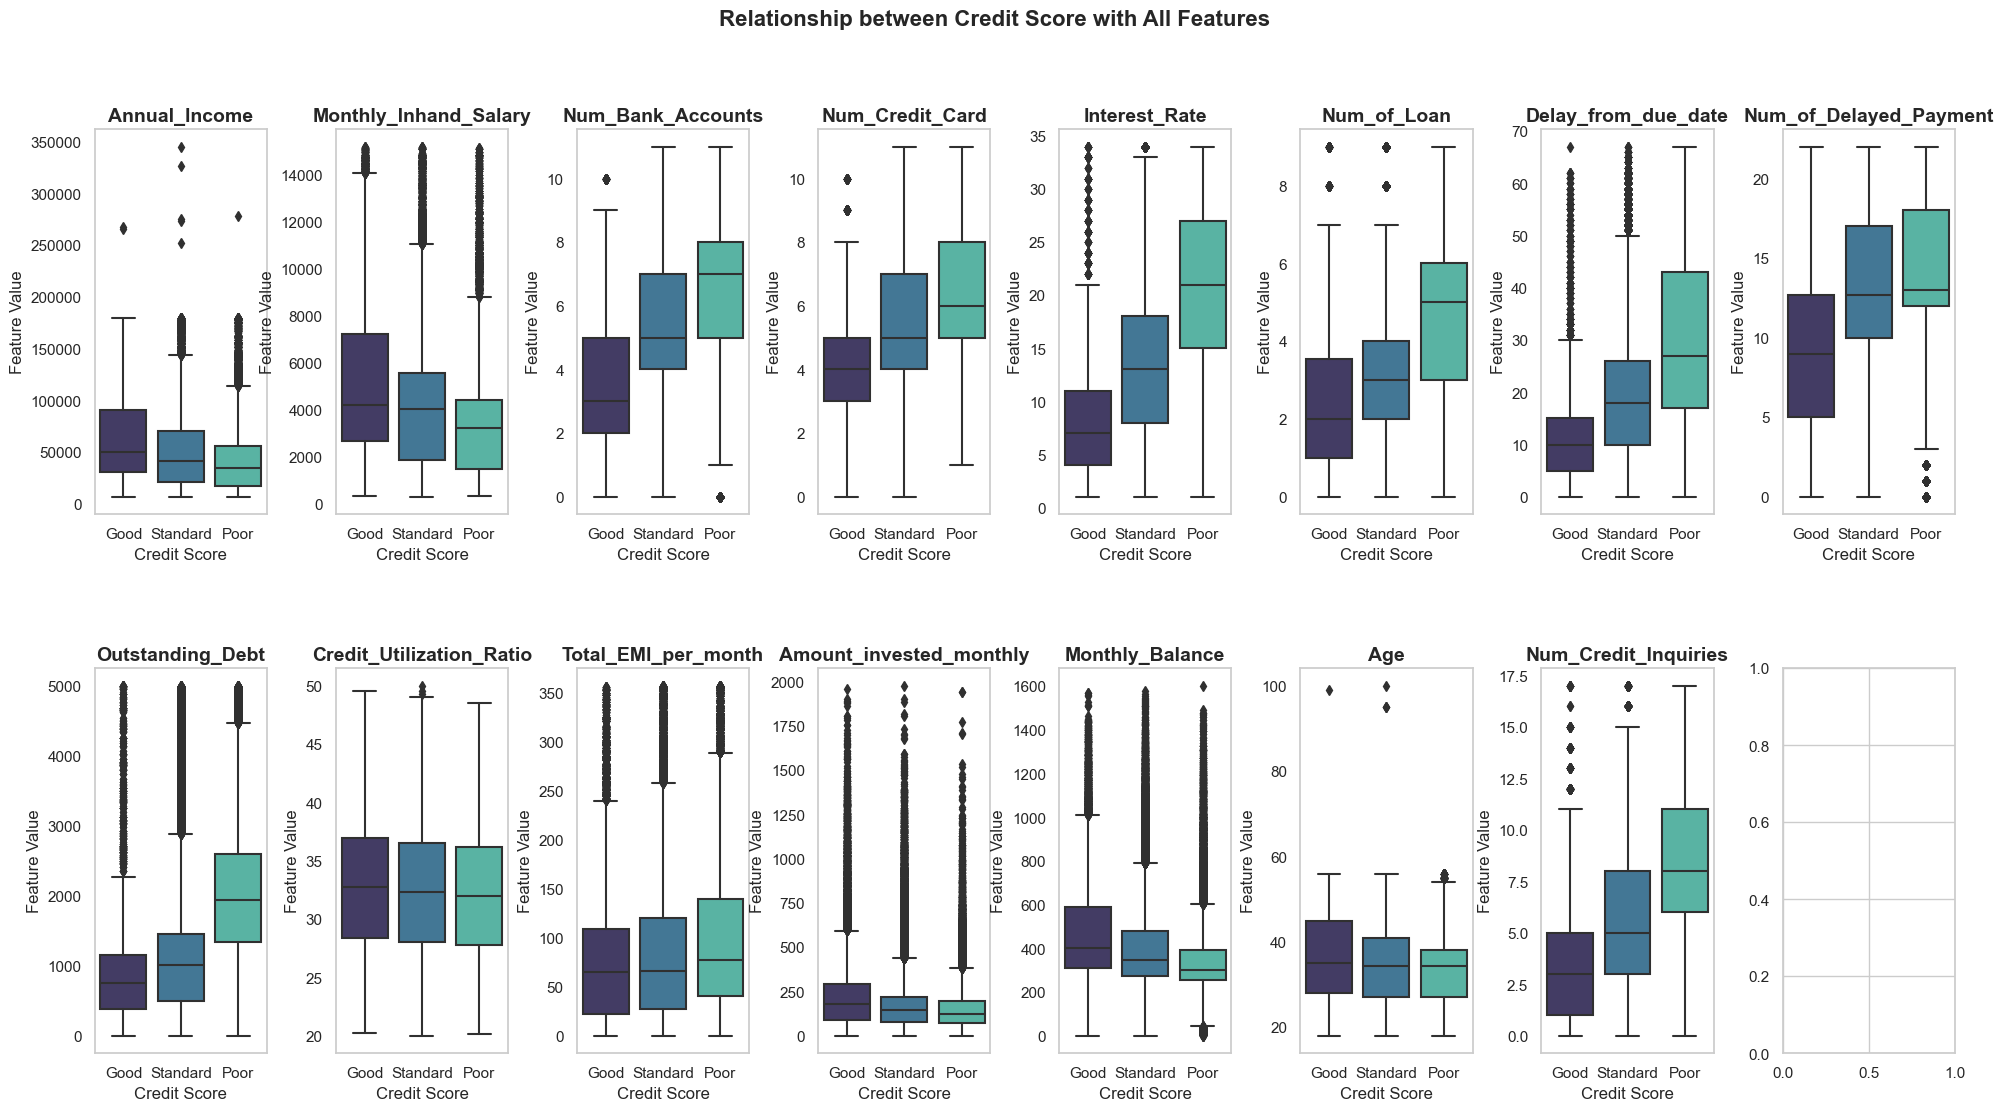

In [324]:
# Create a 2x3 grid of subplots
fig, ax = plt.subplots(2, 8, figsize=(24, 12))

# Flatten the subplot array
ax = ax.flatten()

# List of features to plot
features = ['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
            'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
            'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month',
            'Amount_invested_monthly', 'Monthly_Balance', 'Age', 'Num_Credit_Inquiries']

# Plot box plots for each feature
for i, feature in enumerate(features):
    sns.boxplot(x='Credit_Score', y=feature, data=df, ax=ax[i], palette='mako')
    ax[i].set_title(feature, fontsize=14, fontweight='bold')
    ax[i].set_xlabel('Credit Score', fontsize=12)
    ax[i].set_ylabel('Feature Value', fontsize=12)
    ax[i].grid(color='white', linestyle='-', linewidth=2, alpha=0.5)

# Adjust layout
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.suptitle('Relationship between Credit Score with All Features', fontsize=16, fontweight='bold')

# Show the plot
plt.show()

In [237]:
# Finding Benchmark for determine `Credit_Score`
q3_values_good = {}
q1_values_good = {}
q3_values_poor = {}
q1_values_poor = {}

for feature in features:
    q3_values_good[feature] = np.percentile(df[df['Credit_Score'] == 'Good'][feature], 75)
    q1_values_good[feature] = np.percentile(df[df['Credit_Score'] == 'Good'][feature], 25)
    q3_values_poor[feature] = np.percentile(df[df['Credit_Score'] == 'Poor'][feature], 75)
    q1_values_poor[feature] = np.percentile(df[df['Credit_Score'] == 'Poor'][feature], 25)

# Compare Q3 and Q1 for "Good" and "Poor" categories and print appropriate recommendations
print("From the figures, to have a good credit score:")
for i, feature in enumerate(features):
    recommendation = ""
    if q3_values_good[feature] > q3_values_poor[feature]:
        recommendation = f"{feature} should be higher than around {q3_values_poor[feature]:.2f}"
    elif q1_values_good[feature] < q1_values_poor[feature]:
        recommendation = f"{feature} should be lower than around {q1_values_poor[feature]:.2f}"
    else:
        recommendation = f"No clear recommendation based on Q3 and Q1 values"
    
    print(f"{i+1}. {recommendation}")

From the figures, to have a good credit score:
1. Annual_Income should be higher than around 55938.51
2. Monthly_Inhand_Salary should be higher than around 4417.74
3. Num_Bank_Accounts should be lower than around 5.00
4. Num_Credit_Card should be lower than around 5.00
5. Interest_Rate should be lower than around 15.00
6. Num_of_Loan should be lower than around 3.00
7. Delay_from_due_date should be lower than around 17.00
8. Num_of_Delayed_Payment should be lower than around 12.00
9. Outstanding_Debt should be lower than around 1343.64
10. Credit_Utilization_Ratio should be higher than around 36.21
11. Total_EMI_per_month should be lower than around 40.34
12. Amount_invested_monthly should be higher than around 195.54
13. Monthly_Balance should be higher than around 393.32
14. Age should be higher than around 38.00
15. Num_Credit_Inquiries should be lower than around 6.00


In [325]:
# Custom Function for Credit_ScoreBoxplot
def cred_vs_annual_boxplot(dataframe, column1, column2):
    plt.figure(figsize=(20, 6))
    
    # Plot a box plot
    sns.boxplot(x='Credit_Score', y=column1, data=dataframe, width=0.5, hue=column2, palette='mako')
    plt.title(f'Relationship between Credit Score and {column1} by {column2}', fontsize=16, fontweight='bold')
    plt.xlabel('Credit Score', fontsize=12)
    plt.ylabel(f'{column1}', fontsize=12)
    plt.legend(title=column2)
    plt.grid(color='white', linestyle='-', linewidth=2, alpha=0.5)

    # Show the plot
    plt.show()

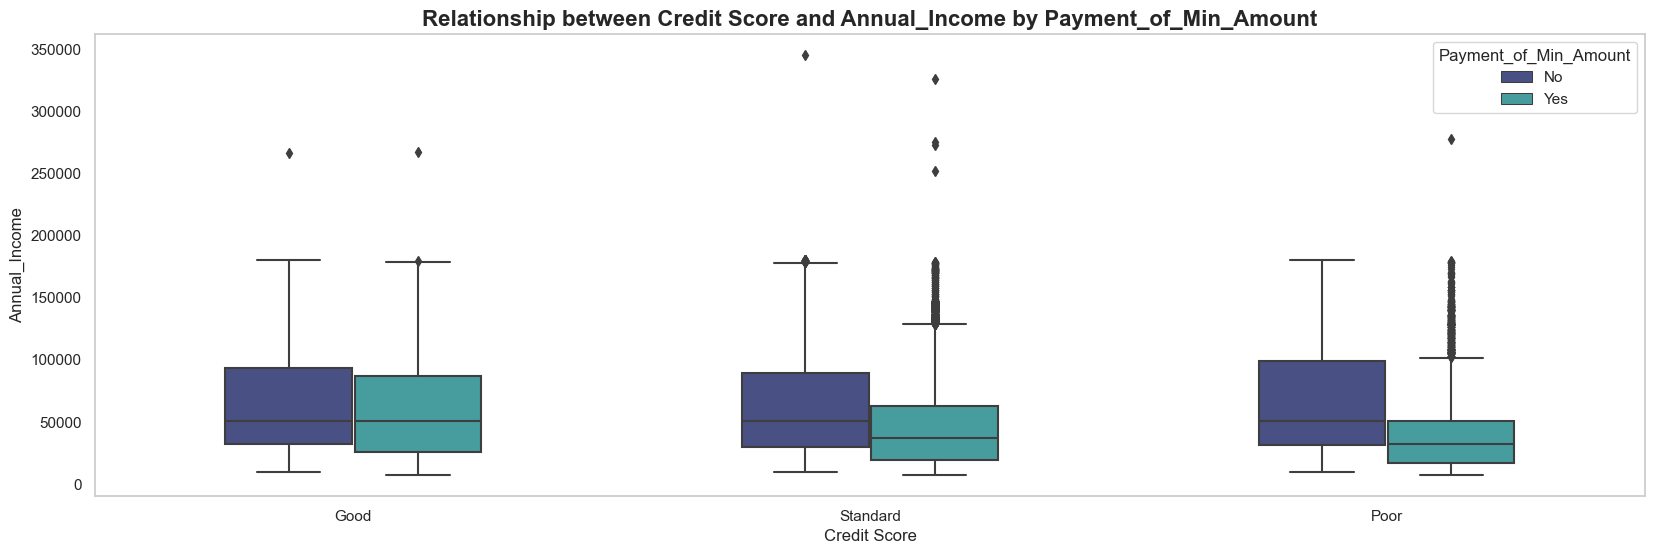

In [326]:
cred_vs_annual_boxplot(df, 'Annual_Income', 'Payment_of_Min_Amount')

Some borrower that have poor credit score & lower annual income tend to pay with minimum amount in order to maintaining credit score, meanwhile some borrower that have good score not affected to decide whether pay with minimum amount or not.

---------------
To maintain a good credit score based on the data, borrowers should aim for the following financial behaviors:
1. Maintain an annual income higher than approximately 55,939 USD.
2. Ensure a monthly take-home salary greater than about 4,418 USD.
3. Have fewer than around 5 bank accounts.
4. Possess fewer than around 5 credit cards.
5. Keep interest rates on loans below approximately 15%.
6. Limit the number of active loans to fewer than around 3.
7. Avoid delays in payments beyond approximately 17 days from the due date.
8. Minimize the occurrences of delayed payments to fewer than around 12.
9. Keep outstanding debt lower than around 1,343  USD.
10. Maintain a credit utilization ratio higher than around 36.21%.
11. Ensure total monthly EMI payments are less than around 40 USD.
12. Invest a monthly amount of at least or more around 196  USD.
13. Maintain a monthly balance higher than around 393 USD. <br>
14. If have difficulty making payment (which lead to poor score), instead of not paying at all, try to do at least minimum amount.
* In conclusion, to maintain a good credit score, individuals should focus on having a steady income, managing their debts responsibly, maintaining a reasonable number of accounts, making payments on time, making payment at least minimum amount (if can't do full payment), and demonstrating financial stability through appropriate investments and balances.

## Top 5 Borrower that have Good Credit Score

In [284]:
filtered_df = df[
    (df['Annual_Income'] > 55938.51) &
    (df['Monthly_Inhand_Salary'] > 4417.74) &
    (df['Num_Bank_Accounts'] < 5.00) &
    (df['Num_Credit_Card'] < 5.00) &
    (df['Interest_Rate'] < 15.00) &
    (df['Num_of_Loan'] < 3.00) &
    (df['Delay_from_due_date'] < 17.00) &
    (df['Num_of_Delayed_Payment'] < 12.00) &
    (df['Outstanding_Debt'] < 1343.64) &
    (df['Credit_Utilization_Ratio'] > 36.21) &
    (df['Total_EMI_per_month'] < 40.34) &
    (df['Amount_invested_monthly'] > 195.54) &
    (df['Monthly_Balance'] > 393.32) &
    (df['Num_Credit_Inquiries'] < 6.00)
]
top5_goodborrower = filtered_df.sort_values(by='Interest_Rate')

In [281]:
row_count_good = len(top5_goodborrower)
print("Number of Rows in DataFrame:", row_count_good)

Number of Rows in DataFrame: 115


In [345]:
grouped_by_name_good = top5_goodborrower.groupby('Name').first()

# Display the specified columns for each group
result_good = grouped_by_name_good[['Interest_Rate', 'Age', 'Occupation', 'Annual_Income',
                                    'Credit_Utilization_Ratio', 'Delay_from_due_date',
                                    'Num_Credit_Inquiries']]

# Display the first 50 rows of the grouped DataFrame
result_good.sort_values(by='Interest_Rate').head(5)

,Interest_Rate,Age,Occupation,Annual_Income,Credit_Utilization_Ratio,Delay_from_due_date,Num_Credit_Inquiries
Name,,,,,,,
Langep,1.0,20.000000,Entrepreneur,106733.13,39.243640,7.0,1.0
Ransdell Piersone,1.0,34.426366,Scientist,70175.78,38.021882,0.0,3.0
Shirboni,1.0,18.000000,Media_Manager,113781.39,37.998760,14.0,1.0
Raymondf,1.0,24.000000,Lawyer,65234.24,37.633227,11.0,1.0
Ellen Freilichl,1.0,52.000000,Scientist,86372.43,37.603381,10.0,3.0


## Bottom 5 Borrower that have Poor Credit Score

In [286]:
filtered_df_poor = df[
    (df['Annual_Income'] < 55938.51) &
    (df['Monthly_Inhand_Salary'] < 4417.74) &
    (df['Num_Bank_Accounts'] > 5.00) &
    (df['Num_Credit_Card'] > 5.00) &
    (df['Interest_Rate'] > 15.00) &
    (df['Num_of_Loan'] > 3.00) &
    (df['Delay_from_due_date'] > 17.00) &
    (df['Num_of_Delayed_Payment'] > 12.00) &
    (df['Outstanding_Debt'] > 1343.64) &
    (df['Credit_Utilization_Ratio'] < 36.21) &
    (df['Total_EMI_per_month'] > 40.34) &
    (df['Amount_invested_monthly'] < 195.54) &
    (df['Monthly_Balance'] < 393.32) &
    (df['Age'] < 38.00) &
    (df['Num_Credit_Inquiries'] > 6.00) &
    (df['Num_Credit_Inquiries'] > 6.00 )
]
top5_poorborrower = filtered_df_poor.sort_values(by='Interest_Rate', ascending=False)

In [288]:
row_count_poor = len(top5_poorborrower)
print("Number of Rows in DataFrame:", row_count_poor)

Number of Rows in DataFrame: 4780


In [346]:
grouped_by_name_poor = top5_poorborrower.groupby('Name').first()

# Display the specified columns for each group
result_poor = grouped_by_name_poor[['Interest_Rate', 'Age', 'Occupation', 'Annual_Income',
                                    'Credit_Utilization_Ratio', 'Delay_from_due_date',
                                    'Num_Credit_Inquiries']]

# Display the first 5 rows of the grouped DataFrame
result_poor.sort_values(by='Interest_Rate').head(5)

,Interest_Rate,Age,Occupation,Annual_Income,Credit_Utilization_Ratio,Delay_from_due_date,Num_Credit_Inquiries
Name,,,,,,,
Andyo,16.0,34.426366,Architect,19041.48000,31.973401,50.0,11.0
Reddallr,16.0,22.000000,Mechanic,50485.81103,28.813102,22.0,10.0
Emelia Sithole-Matarisek,16.0,22.000000,Entrepreneur,18014.30000,33.989474,58.0,9.0
Lewis Krauskopft,16.0,37.000000,Mechanic,14061.55000,32.562537,58.0,13.0
Miyoung Kima,16.0,34.426366,Lawyer,50485.81103,33.617003,25.0,12.0
